#                                           Indicators on men and women

# Group 5:
    Hanin Monir 192895
    Jacinta Samir 206562
    Mohamed Adel 197908

# Aim: 
There are 6 datasets to be used ,along with possible external data, they are indicators on men and
women in multiple fields: marriage, the legal age of marriage, and employment including
part-time jobs, jobs in the academic, legislature, and managerial fields. The data in these tables is
classified by country; through the data, we aim to find insights that reveal information about
several countries and how their cultural traditions affect young girls around the world. Since a lot
of these traditions impose marriage on young girls, these girls become unable to finish their
education, which in return affects many aspects of their lives. While on the other hand, men are
not treated the same way and are given a lot more freedom in the same societies. After analyzing
the data, we aim to find the statistical answers to the questions asked for a more clear
understanding to the case.


In [451]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
import re
from bs4 import BeautifulSoup

# Data Tiding and preparation

## The first indicator is on the legal age of mariage 

In [452]:
LegalAgeForMarriage = pd.read_excel("Legal Age for Marriage.xls")
LegalAgeForMarriage.head()

,Table 3a. Legal age for marriage,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Last update: June 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Minimum Legal Age for Marriage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country or area,Without parental consent,NaN,NaN,NaN,With parental consent,NaN,NaN,NaN,NaN,NaN,Source,Source
3,NaN,women,NaN,men,NaN,NaN,women,NaN,men,NaN,NaN,year,NaN
4,Afghanistan,16,NaN,18,NaN,NaN,15,NaN,…,NaN,NaN,2011,UNPD


First, We will drop all the columns that don't represent any data.

In [453]:
LegalAgeForMarriage.drop(['Unnamed: 2','Unnamed: 4','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 10','Unnamed: 12'], axis= 1, inplace = True)
LegalAgeForMarriage.head()

,Table 3a. Legal age for marriage,Unnamed: 1,Unnamed: 3,Unnamed: 6,Unnamed: 8,Unnamed: 11
0,Last update: June 2013,NaN,NaN,NaN,NaN,NaN
1,Minimum Legal Age for Marriage,NaN,NaN,NaN,NaN,NaN
2,Country or area,Without parental consent,NaN,NaN,NaN,Source
3,NaN,women,men,women,men,year
4,Afghanistan,16,18,15,…,2011


We will rename the columns to make them useful.

In [454]:
LegalAgeForMarriage.rename(columns = {'Table 3a. Legal age for marriage':'Country or area'}, inplace = True)
LegalAgeForMarriage.rename(columns = {'Unnamed: 1':'Without Parental Consent / Women'}, inplace = True)
LegalAgeForMarriage.rename(columns = {'Unnamed: 3':'Without Parental Consent / Men'}, inplace = True)
LegalAgeForMarriage.rename(columns = {'Unnamed: 6':'With Parental Consent / Women'}, inplace = True)
LegalAgeForMarriage.rename(columns = {'Unnamed: 8':'With Parental Consent / Men'}, inplace = True)
LegalAgeForMarriage.rename(columns = {'Unnamed: 11':'Year'}, inplace = True)



We can drop the year column since it will not be used in our analysis.

In [455]:
LegalAgeForMarriage.drop(['Year'], axis=1, inplace = True)

We will also drop the rows that don't contain any data.

In [456]:
LegalAgeForMarriage.drop([0,1,2,3], axis= 0, inplace = True)
LegalAgeForMarriage.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men
4,Afghanistan,16,18,15,…
5,Aland Islands1,18,18,NaN,NaN
6,Albania,…,…,16,18
7,Algeria,19,19,…,…
8,Andorra,16,16,14,14


Now we will reset the index and make it start from 1 

In [457]:
LegalAgeForMarriage = LegalAgeForMarriage.reset_index()

In [458]:
LegalAgeForMarriage.drop(['index'], axis= 1, inplace = True)

In [459]:
LegalAgeForMarriage.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men
0,Afghanistan,16,18,15,…
1,Aland Islands1,18,18,NaN,NaN
2,Albania,…,…,16,18
3,Algeria,19,19,…,…
4,Andorra,16,16,14,14


In [460]:
LegalAgeForMarriage.index = LegalAgeForMarriage.index + 1

In [461]:
LegalAgeForMarriage.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men
1,Afghanistan,16,18,15,…
2,Aland Islands1,18,18,NaN,NaN
3,Albania,…,…,16,18
4,Algeria,19,19,…,…
5,Andorra,16,16,14,14


In [462]:
LegalAgeForMarriage.dtypes

Country or area                     object
Without Parental Consent / Women    object
Without Parental Consent / Men      object
With Parental Consent / Women       object
With Parental Consent / Men         object
dtype: object

The datatypes are not represented correctly, so we need to convert them.

Now, we will correct the string age values to be able to convert them to floats, by replacing them with the minimum age.

In [463]:
LegalAgeForMarriage= LegalAgeForMarriage.replace("<18", 17)
LegalAgeForMarriage= LegalAgeForMarriage.replace("<16" ,15)
LegalAgeForMarriage= LegalAgeForMarriage.replace("<21" ,20)
LegalAgeForMarriage= LegalAgeForMarriage.replace("13-17" ,13)
LegalAgeForMarriage= LegalAgeForMarriage.replace("9-15" ,9)
LegalAgeForMarriage= LegalAgeForMarriage.replace("<14" ,13)
LegalAgeForMarriage= LegalAgeForMarriage.replace('16 and 21' ,16) 
LegalAgeForMarriage= LegalAgeForMarriage.replace('16-18' ,16)
LegalAgeForMarriage= LegalAgeForMarriage.replace('18 and 21' ,18)
LegalAgeForMarriage= LegalAgeForMarriage.replace("12.5-17" ,12.5)

Then, we need to replace the ellipses in the data to null to be able to indentify them and drop them.

In [464]:
LegalAgeForMarriage= LegalAgeForMarriage.replace('…', np.NaN)

In [465]:
LegalAgeForMarriage['With Parental Consent / Men']= LegalAgeForMarriage['With Parental Consent / Men'].astype(float)
LegalAgeForMarriage['With Parental Consent / Women']= LegalAgeForMarriage['With Parental Consent / Women'].astype(float)
LegalAgeForMarriage['Without Parental Consent / Women']= LegalAgeForMarriage['Without Parental Consent / Women'].astype(float)
LegalAgeForMarriage['Without Parental Consent / Men']= LegalAgeForMarriage['Without Parental Consent / Men'].astype(float)

In [466]:
LegalAgeForMarriage.dtypes

Country or area                      object
Without Parental Consent / Women    float64
Without Parental Consent / Men      float64
With Parental Consent / Women       float64
With Parental Consent / Men         float64
dtype: object

Now the datatypes are represented correctly

In [467]:
LegalAgeForMarriage.isna().sum()

Country or area                      0
Without Parental Consent / Women     9
Without Parental Consent / Men       7
With Parental Consent / Women       75
With Parental Consent / Men         84
dtype: int64

Now, we need to find the rows that are completely null and drop them.

In [468]:
nullRows = LegalAgeForMarriage[LegalAgeForMarriage[['Without Parental Consent / Women','Without Parental Consent / Men','With Parental Consent / Women','With Parental Consent / Men']].isna().all(axis=1)]
nullRows.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men
71,Gambia,NaN,NaN,NaN,NaN
146,Palau,NaN,NaN,NaN,NaN
167,Saudi Arabia,NaN,NaN,NaN,NaN


In [469]:
LegalAgeForMarriage.drop([71,146,167], axis= 0, inplace = True)

In [470]:
LegalAgeForMarriage.isna().sum()

Country or area                      0
Without Parental Consent / Women     6
Without Parental Consent / Men       4
With Parental Consent / Women       72
With Parental Consent / Men         81
dtype: int64

We will impute the null ages with the mean value, so that we can operate on them

In [471]:
LegalAgeForMarriage['Without Parental Consent / Women'].fillna(LegalAgeForMarriage['Without Parental Consent / Women'].mean(),inplace = True)

In [472]:
LegalAgeForMarriage['Without Parental Consent / Men'].fillna(LegalAgeForMarriage['Without Parental Consent / Men'].mean(),inplace = True)

In [473]:
LegalAgeForMarriage['With Parental Consent / Women'].fillna(LegalAgeForMarriage['With Parental Consent / Women'].mean(),inplace = True)

In [474]:
LegalAgeForMarriage['With Parental Consent / Men'].fillna(LegalAgeForMarriage['With Parental Consent / Men'].mean(),inplace = True)

In [475]:
LegalAgeForMarriage.isna().sum()

Country or area                     0
Without Parental Consent / Women    0
Without Parental Consent / Men      0
With Parental Consent / Women       0
With Parental Consent / Men         0
dtype: int64

In [476]:
LegalAgeForMarriage.shape

(207, 5)

To find outliers in our data we will use a box plot.

<AxesSubplot:>

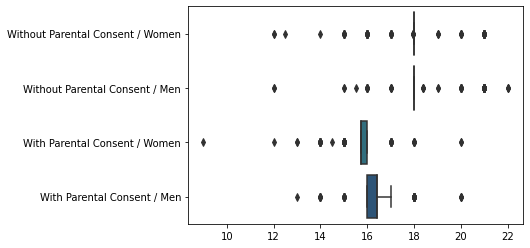

In [477]:
sns.boxplot(data = LegalAgeForMarriage, orient = 'h', palette = 'crest')

As the box plot indicates, there is an outliers, in the "With Parental Consent / Women" column that has  a value below 10, which is a really young age for marriage.

Finally, let's check for any duplicates

In [478]:
LegalAgeForMarriage.duplicated().sum()

0

No duplicates

### Final dataset:

In [479]:
LegalAgeForMarriage

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men
1,Afghanistan,16.000000,18.000000,15.00000,16.420635
2,Aland Islands1,18.000000,18.000000,15.72963,16.420635
3,Albania,17.937811,18.396552,16.00000,18.000000
4,Algeria,19.000000,19.000000,15.72963,16.420635
5,Andorra,16.000000,16.000000,14.00000,14.000000
...,...,...,...,...,...
206,Venezuela 1,12.000000,12.000000,15.72963,16.420635
207,Vietnam,18.000000,20.000000,15.72963,16.420635
208,Yemen,15.000000,15.000000,15.72963,16.420635
209,Zambia,21.000000,21.000000,15.72963,16.420635


## The second indicator is on Marriage across different countries

In [480]:
Marriages = pd.read_excel("Marriages.xls")
Marriages.head()

,Table 3b. Indicators on marriage,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Last update: June 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Population aged 15-19 ever married (%),NaN,NaN,Singulate mean age at marriage,NaN,NaN,Source
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Country or area,Year,Women,Men,NaN,Women,Men,NaN,NaN


First, empty columns are removed.

In [481]:
Marriages.drop(['Unnamed: 4','Unnamed: 7'], axis= 1, inplace = True)
Marriages.head()

,Table 3b. Indicators on marriage,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 8
0,Last update: June 2013,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Population aged 15-19 ever married (%),NaN,Singulate mean age at marriage,NaN,Source
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Country or area,Year,Women,Men,Women,Men,NaN


Rename the columns to give them a clear meaning:

In [482]:
Marriages.rename(columns={'Table 3b. Indicators on marriage':'Country or area','Unnamed: 1':'Year','Unnamed: 2':'Population aged 15-19 ever married (%) / Women','Unnamed: 3':'Population aged 15-19 ever married (%) / Men','Unnamed: 5':'Singulate mean age at marraige / Women','Unnamed: 6':'Singulate mean age at marraige / Men','Unnamed: 8':'Source'}, inplace = True)
Marriages.head()

,Country or area,Year,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men,Source
0,Last update: June 2013,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Population aged 15-19 ever married (%),NaN,Singulate mean age at marriage,NaN,Source
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Country or area,Year,Women,Men,Women,Men,NaN


 Year and Source are irrelevant to our analysis and thus can also be removed.

In [483]:
Marriages.drop(['Year','Source'], axis= 1, inplace = True)
Marriages.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
0,Last update: June 2013,NaN,NaN,NaN,NaN
1,NaN,Population aged 15-19 ever married (%),NaN,Singulate mean age at marriage,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Country or area,Women,Men,Women,Men


The first 4 rows do not hold any data and are a formatting error, so must be removed

In [484]:
Marriages.drop([0,1,2,3,4], inplace = True)
Marriages.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
5,Afghanistan,17.3,…,21.5,…
6,Albania,7.2,2,25.1,29.2
7,Algeria,1.8,0.2,29.5,33
8,American Samoa,21.4,…,25.7,…
9,Angola,35.7,7.6,19.4,24.5


And to fix the index:

In [485]:
Marriages.reset_index(drop=True, inplace=True)
Marriages.index = Marriages.index + 1
Marriages.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
1,Afghanistan,17.3,…,21.5,…
2,Albania,7.2,2,25.1,29.2
3,Algeria,1.8,0.2,29.5,33
4,American Samoa,21.4,…,25.7,…
5,Angola,35.7,7.6,19.4,24.5


The data uses ellipses instead of nulls, so we will  replace them with nulls to be able to query on them, sum them and drop them

In [486]:
Marriages = Marriages.replace('…',np.NaN)
Marriages.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
1,Afghanistan,17.3,NaN,21.5,NaN
2,Albania,7.2,2.0,25.1,29.2
3,Algeria,1.8,0.2,29.5,33.0
4,American Samoa,21.4,NaN,25.7,NaN
5,Angola,35.7,7.6,19.4,24.5


Now we need to find the rows where all the fields are null, by assigning them to a separate new dataframe, then dropping them

In [487]:
nullRows = Marriages[Marriages[['Population aged 15-19 ever married (%) / Women','Population aged 15-19 ever married (%) / Men','Singulate mean age at marraige / Women','Singulate mean age at marraige / Men']].isna().all(axis=1)]
nullRows.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men


The null rows dataframe is empty, so there are no rows in this dataset that have all null values  

In [488]:
Marriages.isna().sum()

Country or area                                    0
Population aged 15-19 ever married (%) / Women     0
Population aged 15-19 ever married (%) / Men      20
Singulate mean age at marraige / Women             0
Singulate mean age at marraige / Men              20
dtype: int64

Now we need to find the rows with null values for the indicators on men, to be able to deal with them

In [489]:
nullRowsMen = Marriages[Marriages[['Population aged 15-19 ever married (%) / Men','Singulate mean age at marraige / Men']].isna().all(axis=1)]
nullRowsMen

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
1,Afghanistan,17.3,NaN,21.5,NaN
4,American Samoa,21.4,NaN,25.7,NaN
44,Colombia,17.0,NaN,22.2,NaN
61,Egypt,13.5,NaN,22.7,NaN
64,Eritrea,31.1,NaN,20.6,NaN
75,Georgia,13.7,NaN,23.4,NaN
84,Guatemala,19.9,NaN,21.6,NaN
88,Honduras,24.7,NaN,21.3,NaN
91,India,27.6,NaN,20.2,NaN
94,Iraq,19.4,NaN,22.8,NaN


We will use this dataframe that countains the null values when answering questions, and for insights that involve a comparison betweeen men and women they will be dropped.

Imputing nulls:

We will impute the null ages with the mean of the column values, so that we can operate on them

In [490]:
Marriages['Population aged 15-19 ever married (%) / Men'].fillna(Marriages['Population aged 15-19 ever married (%) / Men'].mean(), inplace = True)

In [491]:
Marriages['Singulate mean age at marraige / Men'].fillna(Marriages['Singulate mean age at marraige / Men'].mean(), inplace = True)

In [492]:
Marriages.isna().sum()

Country or area                                   0
Population aged 15-19 ever married (%) / Women    0
Population aged 15-19 ever married (%) / Men      0
Singulate mean age at marraige / Women            0
Singulate mean age at marraige / Men              0
dtype: int64

Now, we need to check if the datatypes are represented correctly:

In [493]:
Marriages.dtypes

Country or area                                    object
Population aged 15-19 ever married (%) / Women    float64
Population aged 15-19 ever married (%) / Men      float64
Singulate mean age at marraige / Women            float64
Singulate mean age at marraige / Men              float64
dtype: object

All datatypes are already correctly represented.

<AxesSubplot:>

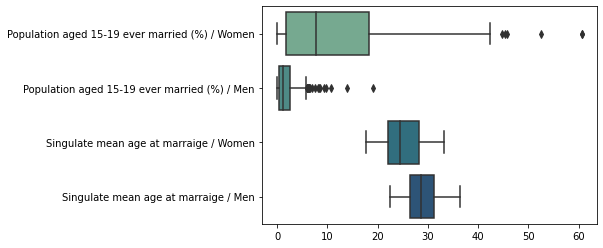

In [494]:
sns.boxplot(data = Marriages, orient = 'h', palette = 'crest')

In [495]:
Marriages[Marriages['Population aged 15-19 ever married (%) / Women'] > 50]

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
119,Mali,52.6,10.7,17.8,24.0
142,Niger,60.6,3.1,17.6,25.1
214,Western Sahara,60.6,1.3,18.0,25.3


Although these values are extreme, we think they are significant for our analysis, in order to demostrate that in some countries young marriage, especially in girls, is prominent, and has consequential drawbacks.

Finally, we'll check for duplicates

In [496]:
Marriages.duplicated().sum()

0

No duplicates

### Final dataset:

In [497]:
Marriages

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
1,Afghanistan,17.3,2.074619,21.5,28.753807
2,Albania,7.2,2.000000,25.1,29.200000
3,Algeria,1.8,0.200000,29.5,33.000000
4,American Samoa,21.4,2.074619,25.7,28.753807
5,Angola,35.7,7.600000,19.4,24.500000
...,...,...,...,...,...
213,Wallis and Futuna Islands,2.1,0.200000,24.3,28.400000
214,Western Sahara,60.6,1.300000,18.0,25.300000
215,Yemen,17.2,3.100000,22.2,25.400000
216,Zambia,19.4,1.200000,21.1,25.500000


## The third indicator is on the number of women legislators and managers in different countries

In [498]:
WomenLegislators = pd.read_excel("Women legislators and managers.xls")
WomenLegislators.head()

,Table 5f. Women legislators and managers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Last update: June 2013,NaN,NaN,NaN,NaN
1,NaN,"Women's share of legislators, senior officials...",NaN,NaN,NaN
2,Country or area,Year,NaN,%,Source
3,Algeria,2004,NaN,4.870624,LFS
4,Anguilla,2001,NaN,52.03252,PC


The footnotes were put in a column of their own and we don't need them, so we will remove them.

In [499]:
WomenLegislators.drop(['Unnamed: 2'], axis= 1, inplace = True)
WomenLegislators.head()

,Table 5f. Women legislators and managers,Unnamed: 1,Unnamed: 3,Unnamed: 4
0,Last update: June 2013,NaN,NaN,NaN
1,NaN,"Women's share of legislators, senior officials...",NaN,NaN
2,Country or area,Year,%,Source
3,Algeria,2004,4.870624,LFS
4,Anguilla,2001,52.03252,PC


 Fix the column headers to give them meaningful names:

In [500]:
WomenLegislators.rename(columns = {'Table 5f. Women legislators and managers':'Country or area','Unnamed: 1':'Year','Unnamed: 3':'%','Unnamed: 4':'Source'}, inplace = True)
WomenLegislators.rename(columns = {'%':"Women's share of legislators, senior officials and managers (%)"}, inplace = True)
WomenLegislators.head()

,Country or area,Year,"Women's share of legislators, senior officials and managers (%)",Source
0,Last update: June 2013,NaN,NaN,NaN
1,NaN,"Women's share of legislators, senior officials...",NaN,NaN
2,Country or area,Year,%,Source
3,Algeria,2004,4.870624,LFS
4,Anguilla,2001,52.03252,PC


The year and source columns are unneeded in our analysis, so those too can be removed.

In [501]:
WomenLegislators.drop(['Year','Source'], axis= 1, inplace = True)
WomenLegislators.head()

,Country or area,"Women's share of legislators, senior officials and managers (%)"
0,Last update: June 2013,NaN
1,NaN,NaN
2,Country or area,%
3,Algeria,4.870624
4,Anguilla,52.03252


The first three rows are useless and a result of incorrect formatting, thus must be removed.

In [502]:
WomenLegislators.drop([0,1,2], inplace = True)
WomenLegislators.head()

,Country or area,"Women's share of legislators, senior officials and managers (%)"
3,Algeria,4.870624
4,Anguilla,52.03252
5,Antigua and Barbuda,45.059786
6,Argentina,23.120202
7,Armenia,23.939559


Removing these rows messed up the index. To fix:

In [503]:
WomenLegislators.reset_index(drop=True, inplace=True)
WomenLegislators.head()

,Country or area,"Women's share of legislators, senior officials and managers (%)"
0,Algeria,4.870624
1,Anguilla,52.03252
2,Antigua and Barbuda,45.059786
3,Argentina,23.120202
4,Armenia,23.939559


We want our index to begin at 1.

In [504]:
WomenLegislators.index = WomenLegislators.index + 1
WomenLegislators.head()

,Country or area,"Women's share of legislators, senior officials and managers (%)"
1,Algeria,4.870624
2,Anguilla,52.03252
3,Antigua and Barbuda,45.059786
4,Argentina,23.120202
5,Armenia,23.939559


We need to check for nulls:

In [505]:
WomenLegislators.isna().sum()

Country or area                                                    0
Women's share of legislators, senior officials and managers (%)    0
dtype: int64

The dataset has no nulls

Now to check the column's datatypes:

In [506]:
WomenLegislators.dtypes

Country or area                                                    object
Women's share of legislators, senior officials and managers (%)    object
dtype: object

The percentage share column should be a float.

In [507]:
WomenLegislators["Women's share of legislators, senior officials and managers (%)"] = WomenLegislators["Women's share of legislators, senior officials and managers (%)"].astype(float)
WomenLegislators.dtypes

Country or area                                                     object
Women's share of legislators, senior officials and managers (%)    float64
dtype: object

<AxesSubplot:>

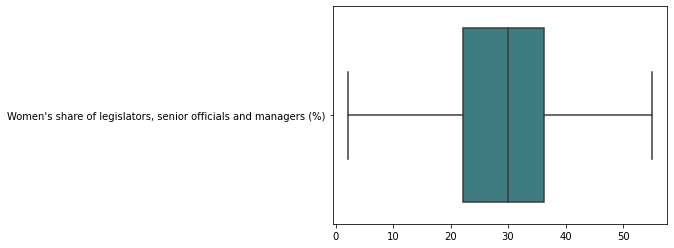

In [508]:
sns.boxplot(data = WomenLegislators, orient = 'h', palette = 'crest')

No outliers can be seen in this dataset.

Finally, we'll check for duplicates

In [509]:
WomenLegislators.duplicated().sum()

0

No duplicates

### Final dataset:

In [510]:
WomenLegislators

,Country or area,"Women's share of legislators, senior officials and managers (%)"
1,Algeria,4.870624
2,Anguilla,52.032520
3,Antigua and Barbuda,45.059786
4,Argentina,23.120202
5,Armenia,23.939559
...,...,...
119,United Republic of Tanzania,16.469456
120,United States,42.667392
121,Uruguay,40.274600
122,Viet Nam,22.177083


## The fourth indicator is on men and women illiteracy (external dataset)

In [511]:
illiteracy = pd.read_excel("Illiteracy.xlsx")
illiteracy.head()

,Country,Year,"Illiteracy rate (%), population aged",Unnamed: 3,"Illiteracy rate (%), population aged.1",Unnamed: 5,Notes
0,NaN,NaN,15 - 24,NaN,25 or over,NaN,NaN
1,NaN,NaN,W,M,W,M,NaN
2,Africa,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,2000-2004,14.4,6,..,..,-1
4,Angola,2001,37.4,17.3,..,..,-2


In [512]:
illiteracy.rename(columns = {'Illiteracy rate (%), population aged':'Illiteracy rate (%), population aged 15-24 (Women)'}, inplace = True)
illiteracy.rename(columns = {'Unnamed: 3':'Illiteracy rate (%), population aged 15-24 (Men)'}, inplace = True)
illiteracy.rename(columns = {'Illiteracy rate (%), population aged.1':'Illiteracy rate (%), population aged 25 or over (Women)'}, inplace = True)
illiteracy.rename(columns = {'Unnamed: 5':'Illiteracy rate (%), population aged 25 or over (Men)'}, inplace = True)
illiteracy.rename(columns = {'Country':'Country or area'}, inplace = True)

In [513]:
illiteracy.head()

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)","Illiteracy rate (%), population aged 25 or over (Women)","Illiteracy rate (%), population aged 25 or over (Men)",Notes
0,NaN,NaN,15 - 24,NaN,25 or over,NaN,NaN
1,NaN,NaN,W,M,W,M,NaN
2,Africa,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,2000-2004,14.4,6,..,..,-1
4,Angola,2001,37.4,17.3,..,..,-2


We will drop columns and rows that don't represent any data.

In [514]:
illiteracy.drop(['Notes'], axis= 1, inplace = True)

In [515]:
illiteracy.drop([0,1,2], axis= 0, inplace = True)

Now, we will reset the index to start from 1.

In [516]:
illiteracy=illiteracy.reset_index()

In [517]:
illiteracy.drop(['index'], axis= 1, inplace = True)
illiteracy.index = illiteracy.index+1

In [518]:
illiteracy.head()

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)","Illiteracy rate (%), population aged 25 or over (Women)","Illiteracy rate (%), population aged 25 or over (Men)"
1,Algeria,2000-2004,14.4,6,..,..
2,Angola,2001,37.4,17.3,..,..
3,Benin,2002,67.5,41.8,..,..
4,Botswana,2000-2004,7.2,14.5,..,..
5,Burkina Faso,1996,86,74.5,..,..


In [519]:
illiteracy.dtypes

Country or area                                            object
Year                                                       object
Illiteracy rate (%), population aged 15-24 (Women)         object
Illiteracy rate (%), population aged 15-24 (Men)           object
Illiteracy rate (%), population aged 25 or over (Women)    object
Illiteracy rate (%), population aged 25 or over (Men)      object
dtype: object

The datatypes are not represented correctly, the percentages columns must be floats

In [520]:
illiteracy['Illiteracy rate (%), population aged 15-24 (Women)'] = illiteracy['Illiteracy rate (%), population aged 15-24 (Women)'].astype(float)
illiteracy['Illiteracy rate (%), population aged 15-24 (Men)']= illiteracy['Illiteracy rate (%), population aged 15-24 (Men)'].astype(float)

In [521]:
illiteracy.dtypes

Country or area                                             object
Year                                                        object
Illiteracy rate (%), population aged 15-24 (Women)         float64
Illiteracy rate (%), population aged 15-24 (Men)           float64
Illiteracy rate (%), population aged 25 or over (Women)     object
Illiteracy rate (%), population aged 25 or over (Men)       object
dtype: object

The last columns cannot be changed yet since that they contain string values like spaces and ellipses, so we will replace them with nulls to be able to count them and drop them

In [522]:
illiteracy= illiteracy.replace('\xa0..', np.NaN)

In [523]:
illiteracy= illiteracy.replace('..', np.NaN)

Now we can change them.

In [524]:
illiteracy['Illiteracy rate (%), population aged 25 or over (Women)']= illiteracy['Illiteracy rate (%), population aged 25 or over (Women)'].astype(float)

In [525]:
illiteracy['Illiteracy rate (%), population aged 25 or over (Women)']= illiteracy['Illiteracy rate (%), population aged 25 or over (Women)'].astype(float)

In [526]:
illiteracy.dtypes

Country or area                                             object
Year                                                        object
Illiteracy rate (%), population aged 15-24 (Women)         float64
Illiteracy rate (%), population aged 15-24 (Men)           float64
Illiteracy rate (%), population aged 25 or over (Women)    float64
Illiteracy rate (%), population aged 25 or over (Men)      float64
dtype: object

In [527]:
illiteracy.isna().sum()

Country or area                                              0
Year                                                         5
Illiteracy rate (%), population aged 15-24 (Women)           5
Illiteracy rate (%), population aged 15-24 (Men)             5
Illiteracy rate (%), population aged 25 or over (Women)    106
Illiteracy rate (%), population aged 25 or over (Men)      106
dtype: int64

First, we will find all the rows that are completely null then drop them

In [528]:
nullRowsIlliteracy = illiteracy[illiteracy[['Year','Illiteracy rate (%), population aged 15-24 (Women)','Illiteracy rate (%), population aged 15-24 (Men)','Illiteracy rate (%), population aged 25 or over (Women)','Illiteracy rate (%), population aged 25 or over (Men)']].isna().all(axis=1)]
nullRowsIlliteracy

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)","Illiteracy rate (%), population aged 25 or over (Women)","Illiteracy rate (%), population aged 25 or over (Men)"
44,"America, North",NaN,NaN,NaN,NaN,NaN
63,"America, South",NaN,NaN,NaN,NaN,NaN
75,Asia,NaN,NaN,NaN,NaN,NaN
116,Europe,NaN,NaN,NaN,NaN,NaN
137,Oceania,NaN,NaN,NaN,NaN,NaN


In [529]:
illiteracy.drop([44,63,75,116,137], axis=0, inplace= True)

In [530]:
illiteracy.isna().sum()

Country or area                                              0
Year                                                         0
Illiteracy rate (%), population aged 15-24 (Women)           0
Illiteracy rate (%), population aged 15-24 (Men)             0
Illiteracy rate (%), population aged 25 or over (Women)    101
Illiteracy rate (%), population aged 25 or over (Men)      101
dtype: int64

The last 2 columns still have too many nulls.

In [531]:
nullRowsIlliteracy = illiteracy[illiteracy[['Illiteracy rate (%), population aged 25 or over (Women)','Illiteracy rate (%), population aged 25 or over (Men)']].isna().all(axis=1)]
nullRowsIlliteracy

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)","Illiteracy rate (%), population aged 25 or over (Women)","Illiteracy rate (%), population aged 25 or over (Men)"
1,Algeria,2000-2004,14.4,6.0,NaN,NaN
2,Angola,2001,37.4,17.3,NaN,NaN
3,Benin,2002,67.5,41.8,NaN,NaN
4,Botswana,2000-2004,7.2,14.5,NaN,NaN
5,Burkina Faso,1996,86.0,74.5,NaN,NaN
...,...,...,...,...,...,...
133,Slovakia,2001,0.3,0.4,NaN,NaN
134,Slovenia,2000-2004,0.2,0.2,NaN,NaN
139,New Caledonia,1996,0.9,1.0,NaN,NaN
140,Papua New Guinea,2000,35.9,30.9,NaN,NaN


Because the columns "Illiteracy rate (%), population aged 25 or over (Women)" and "Illiteracy rate (%), population aged 25 or over (Men)" are mostly nulls and will not contribute to our analysis, so it is best to drop them. 

In [532]:
illiteracy.drop(['Illiteracy rate (%), population aged 25 or over (Women)','Illiteracy rate (%), population aged 25 or over (Men)'], axis = 1, inplace = True)

In [533]:
illiteracy.isna().sum()

Country or area                                       0
Year                                                  0
Illiteracy rate (%), population aged 15-24 (Women)    0
Illiteracy rate (%), population aged 15-24 (Men)      0
dtype: int64

<AxesSubplot:>

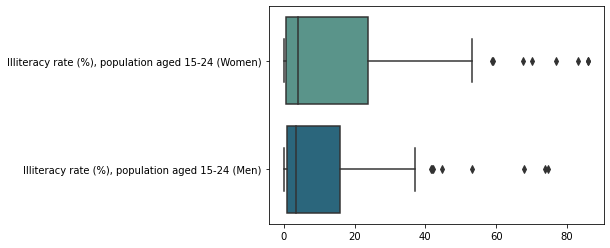

In [534]:
sns.boxplot(data = illiteracy, orient = 'h', palette = 'crest')

In [535]:
illiteracy[illiteracy['Illiteracy rate (%), population aged 15-24 (Women)'] > 60]

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)"
3,Benin,2002,67.5,41.8
5,Burkina Faso,1996,86.0,74.5
9,Chad,2000,76.9,44.7
22,Mali,1998,83.1,67.7
28,Niger,2001,85.8,73.8
34,Sierra Leone,2000,70.1,53.1


In [536]:
illiteracy[illiteracy['Illiteracy rate (%), population aged 15-24 (Men)'] > 50]

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)"
5,Burkina Faso,1996,86.0,74.5
22,Mali,1998,83.1,67.7
28,Niger,2001,85.8,73.8
34,Sierra Leone,2000,70.1,53.1


Although these values appear to be outliers, they are real and meaningful as these are countries that understandably have high rates of illiteracy, so these values will not be removed/imputed.


Finally, we'll check for duplicates

In [537]:
illiteracy.duplicated().sum()

0

No duplicates

### Final dataset:

In [538]:
illiteracy

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)"
1,Algeria,2000-2004,14.4,6.0
2,Angola,2001,37.4,17.3
3,Benin,2002,67.5,41.8
4,Botswana,2000-2004,7.2,14.5
5,Burkina Faso,1996,86.0,74.5
...,...,...,...,...
138,Fiji,1996,0.6,0.9
139,New Caledonia,1996,0.9,1.0
140,Papua New Guinea,2000,35.9,30.9
141,Samoa,2000-2004,0.5,0.6


## The Fifth indicator is on the provided maternity leave benefits

In [539]:
MaternityLeaveBenefits = pd.read_excel("Maternity leave benefits.xls")
MaternityLeaveBenefits.head()

,Table 5g. Maternity leave benefits,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Last Update: June 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country or area,Length of maternity \nleave,NaN,NaN,NaN,NaN,Percentage of wages paid in covered period (%),NaN,NaN,Provider of benefit
2,Afghanistan,NaN,90,days,NaN,NaN,100,NaN,NaN,Employer
3,Albania,NaN,365,calendar days,NaN,NaN,"80, 50",a,NaN,Social insurance system
4,Algeria,NaN,14,weeks,NaN,NaN,100,NaN,NaN,Social security


We will drop the first 2 rows as they don't contain any data

In [540]:
MaternityLeaveBenefits.drop([0,1,], axis = 0, inplace = True)

Now, we will rename the columns to be meaningful

In [541]:
MaternityLeaveBenefits.rename(columns = {'Table 5g. Maternity leave benefits':'Country or area'}, inplace = True)

In [542]:
MaternityLeaveBenefits.rename(columns = {'Unnamed: 2':'Length of maternity leave'}, inplace = True)

In [543]:
MaternityLeaveBenefits.rename(columns = {'Unnamed: 3':'Unit'}, inplace = True)

In [544]:
MaternityLeaveBenefits.rename(columns = {'Unnamed: 6':'Percentage of wages paid in covered period (%)'}, inplace = True)

In [545]:
MaternityLeaveBenefits.rename(columns = {'Unnamed: 9':'Provider of benefit'}, inplace = True)

We will drop extra empty columns

In [546]:
MaternityLeaveBenefits.drop(['Unnamed: 1','Unnamed: 4','Unnamed: 5','Unnamed: 7','Unnamed: 8'], axis= 1, inplace = True)

We will reset the index and make it start from 1

In [547]:
MaternityLeaveBenefits=MaternityLeaveBenefits.reset_index()

In [548]:
MaternityLeaveBenefits.drop(['index'], axis= 1, inplace = True)
MaternityLeaveBenefits.index = MaternityLeaveBenefits.index+1

In [549]:
MaternityLeaveBenefits.head()

,Country or area,Length of maternity leave,Unit,Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,90,days,100,Employer
2,Albania,365,calendar days,"80, 50",Social insurance system
3,Algeria,14,weeks,100,Social security
4,Andora,16,weeks,100,Social insurance system
5,Angola,12,weeks,100,Social security and Employer


In [550]:
MaternityLeaveBenefits.dtypes

Country or area                                   object
Length of maternity leave                         object
Unit                                              object
Percentage of wages paid in covered period (%)    object
Provider of benefit                               object
dtype: object

The datatypes are not represented correctly and need to be changed

Before changing them, we need to find the columns that contain chracters with numbers and drop them since that they will cause errors and that they correspond to certain conditions, specified in the footnotes, which are irrelevant to our analysis

In [551]:
MaternityLeaveBenefits['Percentage of wages paid in covered period (%)'].str.contains(',').sum()

12

Now we know there are 12 rows containing  ","  in the 'Percentage of wages paid in covered period (%)'  column, and we need to get their indexices to drop them

To get the indexices of these 12 rows, we will use ".contains()" function and store its results, being (True or False), in a list. Then, we will loop on that list and check if the result is true, we will add the index to the dropping list.

In [552]:
commaList = MaternityLeaveBenefits['Percentage of wages paid in covered period (%)'].str.contains(',').tolist()
indexicesToBeDropped= [ ]
i=0
for i in range(len(commaList)):
    if commaList[i]== True:
        indexicesToBeDropped.append(i+1)
print(commaList)
indexicesToBeDropped

[nan, True, nan, nan, nan, True, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, True, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, True, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, True, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, True, nan, nan, False, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, True, nan, nan, nan, nan, nan, True, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, True, nan, False, nan, nan, nan, nan, False, nan, nan, True, True, nan, nan, nan, nan, True, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan]


[2, 6, 17, 70, 99, 123, 137, 143, 154, 164, 165, 170]


Now we will going to take a look at each of these rows reading the footnotes to appropriatly fix the percentage of wages.

In [553]:
MaternityLeaveBenefits.loc[165]

Country or area                                                         Tunisia
Length of maternity leave                                                  1, 2
Unit                                                                   month(s)
Percentage of wages paid in covered period (%)                      67, 50, 100
Provider of benefit                               National Social Security Fund
Name: 165, dtype: object

In [554]:
reg= "67, 50, 100"
newVal = 72
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [555]:
MaternityLeaveBenefits.loc[164]

Country or area                                                      Trinidad and Tobago
Length of maternity leave                                                             13
Unit                                                                               weeks
Percentage of wages paid in covered period (%)                                   100, 50
Provider of benefit                               Employer and National Insurance Board 
Name: 164, dtype: object

In [556]:
reg= "100, 50"
newVal = 75
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [557]:
MaternityLeaveBenefits.loc[154]

Country or area                                   Sri Lanka
Length of maternity leave                                12
Unit                                                  weeks
Percentage of wages paid in covered period (%)      86, 100
Provider of benefit                                Employer
Name: 154, dtype: object

In [558]:
reg= "86, 100"
newVal = 93
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [559]:
MaternityLeaveBenefits.loc[137]

Country or area                                                                              Rwanda
Length of maternity leave                                                                        12
Unit                                                                                          weeks
Percentage of wages paid in covered period (%)                                              100, 20
Provider of benefit                               Employer (if women not covered by social secur...
Name: 137, dtype: object

In [560]:
reg= "100, 20"
newVal = 60
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [561]:
MaternityLeaveBenefits.loc[123]

Country or area                                             Norway
Length of maternity leave                                       52
Unit                                                         weeks
Percentage of wages paid in covered period (%)             80, 100
Provider of benefit                               Social insurance
Name: 123, dtype: object

In [562]:
reg= "80, 100"
newVal = 90
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [563]:
MaternityLeaveBenefits.loc[99]

Country or area                                                              Libyan Arab Jamahiriya
Length of maternity leave                                                                        14
Unit                                                                                          weeks
Percentage of wages paid in covered period (%)                                              50, 100
Provider of benefit                               Employer, Social security for self-employed women
Name: 99, dtype: object

In [564]:
reg= "50, 100"
newVal = 75
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [565]:
MaternityLeaveBenefits.loc[17]

Country or area                                           Belgium
Length of maternity leave                                      15
Unit                                                        weeks
Percentage of wages paid in covered period (%)           79.5, 75
Provider of benefit                               Social security
Name: 17, dtype: object

In [566]:
reg= "79.5, 75"
newVal = 77.25
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [567]:
MaternityLeaveBenefits.loc[6]

Country or area                                             Antigua and Barbuda
Length of maternity leave                                                    13
Unit                                                                      weeks
Percentage of wages paid in covered period (%)                          100, 60
Provider of benefit                               Social insurance and Employer
Name: 6, dtype: object

In [568]:
reg= "100, 60"
newVal = 80
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

In [569]:
MaternityLeaveBenefits.loc[2]

Country or area                                                   Albania
Length of maternity leave                                             365
Unit                                                        calendar days
Percentage of wages paid in covered period (%)                     80, 50
Provider of benefit                               Social insurance system
Name: 2, dtype: object

In [570]:
reg= "80, 50"
newVal = 65
MaternityLeaveBenefits["Percentage of wages paid in covered period (%)"].replace(to_replace = reg, value = newVal, inplace=True)

if we know check to find the indexices contains null we will find that the list is empty

In [571]:
commaList = MaternityLeaveBenefits['Percentage of wages paid in covered period (%)'].str.contains(',').tolist()
indexices= [ ]
i=0
for i in range(len(commaList)):
    if commaList[i]== True:
        indexices.append(i+1)
print(commaList)
indexices

[nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan]


[]

In [572]:
MaternityLeaveBenefits=MaternityLeaveBenefits.reset_index()
MaternityLeaveBenefits.drop(['index'], axis= 1, inplace = True)
MaternityLeaveBenefits.index = MaternityLeaveBenefits.index+1
MaternityLeaveBenefits.head()

,Country or area,Length of maternity leave,Unit,Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,90,days,100,Employer
2,Albania,365,calendar days,65,Social insurance system
3,Algeria,14,weeks,100,Social security
4,Andora,16,weeks,100,Social insurance system
5,Angola,12,weeks,100,Social security and Employer


Again, using the same logic, we will drop the rows containing a  "- ".

In [573]:
MaternityLeaveBenefits['Percentage of wages paid in covered period (%)'].str.contains('-').sum()

2

In [574]:
dropList = MaternityLeaveBenefits['Percentage of wages paid in covered period (%)'].str.contains('-').tolist()
newL= [ ]
i=0
for i in range(len(dropList)):
    if dropList[i]== True:
        newL.append(i+1)
print(dropList)
newL

[nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, True, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, True, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan, nan]


[22, 131]

In [575]:
MaternityLeaveBenefits.drop(newL, axis=0, inplace = True)

In [576]:
MaternityLeaveBenefits=MaternityLeaveBenefits.reset_index()
MaternityLeaveBenefits.drop(['index'], axis= 1, inplace = True)
MaternityLeaveBenefits.index = MaternityLeaveBenefits.index+1
MaternityLeaveBenefits.head()

,Country or area,Length of maternity leave,Unit,Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,90,days,100,Employer
2,Albania,365,calendar days,65,Social insurance system
3,Algeria,14,weeks,100,Social security
4,Andora,16,weeks,100,Social insurance system
5,Angola,12,weeks,100,Social security and Employer


Now we need to replace some string values in the columns to be able to comvert them to floats.

In [577]:
MaternityLeaveBenefits = MaternityLeaveBenefits.replace('50+', 50)

In [578]:
MaternityLeaveBenefits = MaternityLeaveBenefits.replace('…', np.NaN)

In [579]:
MaternityLeaveBenefits = MaternityLeaveBenefits.replace('1+', 1)

In [580]:
MaternityLeaveBenefits = MaternityLeaveBenefits.replace('6+', 6)

In [581]:
MaternityLeaveBenefits = MaternityLeaveBenefits.replace('120, 90, 75', 90)

In [582]:
MaternityLeaveBenefits = MaternityLeaveBenefits.replace('4-6', 5)

In [583]:
MaternityLeaveBenefits = MaternityLeaveBenefits.replace('1, 2', 2)

Finally, we will change the column datatypes to be correctly represented as floats

In [584]:
MaternityLeaveBenefits['Length of maternity leave']= MaternityLeaveBenefits['Length of maternity leave'].astype(float)

In [585]:
MaternityLeaveBenefits['Percentage of wages paid in covered period (%)']= MaternityLeaveBenefits['Percentage of wages paid in covered period (%)'].astype(float)

In [586]:
MaternityLeaveBenefits.dtypes

Country or area                                    object
Length of maternity leave                         float64
Unit                                               object
Percentage of wages paid in covered period (%)    float64
Provider of benefit                                object
dtype: object

The datatypes are now represented correctly.

In [587]:
MaternityLeaveBenefits.shape

(179, 5)

In [588]:
MaternityLeaveBenefits['Unit'].unique()

array(['days', 'calendar days', 'weeks', 'months', 'year', 'working days',
       'days ', 'month(s)', 'weeks '], dtype=object)

In [589]:
MaternityLeaveBenefits.head()

,Country or area,Length of maternity leave,Unit,Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,90.0,days,100.0,Employer
2,Albania,365.0,calendar days,65.0,Social insurance system
3,Algeria,14.0,weeks,100.0,Social security
4,Andora,16.0,weeks,100.0,Social insurance system
5,Angola,12.0,weeks,100.0,Social security and Employer


The "Length of maternity leave" columns represents data that has different unit, so we need to unify the unit to weeks

In [590]:
MaternityLeaveBenefits.loc[MaternityLeaveBenefits['Unit'] == 'days', 'Length of maternity leave'] = MaternityLeaveBenefits['Length of maternity leave']/7


In [591]:
MaternityLeaveBenefits.loc[MaternityLeaveBenefits['Unit'] == 'days ', 'Length of maternity leave'] = MaternityLeaveBenefits['Length of maternity leave']/7

In [592]:
MaternityLeaveBenefits.loc[MaternityLeaveBenefits['Unit'] == 'calendar days', 'Length of maternity leave'] = MaternityLeaveBenefits['Length of maternity leave']/7

In [593]:
MaternityLeaveBenefits.loc[MaternityLeaveBenefits['Unit'] == 'months', 'Length of maternity leave'] = MaternityLeaveBenefits['Length of maternity leave']*4

In [594]:
MaternityLeaveBenefits.loc[MaternityLeaveBenefits['Unit'] == 'year', 'Length of maternity leave'] = MaternityLeaveBenefits['Length of maternity leave']*52

In [595]:
MaternityLeaveBenefits.loc[MaternityLeaveBenefits['Unit'] == 'working days', 'Length of maternity leave'] = MaternityLeaveBenefits['Length of maternity leave']/5

In [596]:
MaternityLeaveBenefits

,Country or area,Length of maternity leave,Unit,Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,12.857143,days,100.0,Employer
2,Albania,52.142857,calendar days,65.0,Social insurance system
3,Algeria,14.000000,weeks,100.0,Social security
4,Andora,16.000000,weeks,100.0,Social insurance system
5,Angola,12.000000,weeks,100.0,Social security and Employer
...,...,...,...,...,...
175,Venezuela,18.000000,weeks,100.0,Social security
176,Viet Nam,20.000000,months,100.0,Social insurance fund
177,Yemen,8.571429,days,100.0,Employer
178,Zambia,12.000000,weeks,100.0,Employer


Since that the length unit has been unified to weeks, we don't need the unit column anymore.

In [597]:
MaternityLeaveBenefits.drop(['Unit'], axis = 1, inplace = True)
MaternityLeaveBenefits.head()

,Country or area,Length of maternity leave,Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,12.857143,100.0,Employer
2,Albania,52.142857,65.0,Social insurance system
3,Algeria,14.000000,100.0,Social security
4,Andora,16.000000,100.0,Social insurance system
5,Angola,12.000000,100.0,Social security and Employer


In [598]:
MaternityLeaveBenefits.rename(columns = {'Length of maternity leave':'Length of maternity leave (Weeks)'}, inplace = True)

In [599]:
MaternityLeaveBenefits

,Country or area,Length of maternity leave (Weeks),Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,12.857143,100.0,Employer
2,Albania,52.142857,65.0,Social insurance system
3,Algeria,14.000000,100.0,Social security
4,Andora,16.000000,100.0,Social insurance system
5,Angola,12.000000,100.0,Social security and Employer
...,...,...,...,...
175,Venezuela,18.000000,100.0,Social security
176,Viet Nam,20.000000,100.0,Social insurance fund
177,Yemen,8.571429,100.0,Employer
178,Zambia,12.000000,100.0,Employer


We will round the values

In [600]:
MaternityLeaveBenefits['Length of maternity leave (Weeks)']= MaternityLeaveBenefits['Length of maternity leave (Weeks)'].round() 

<AxesSubplot:>

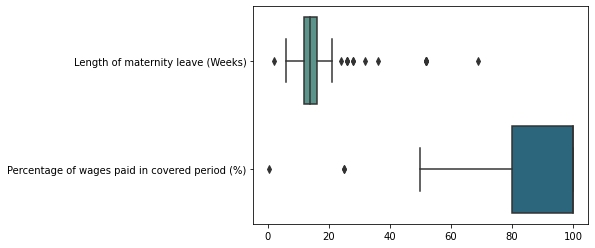

In [601]:
sns.boxplot(data = MaternityLeaveBenefits, orient = 'h', palette = 'crest')

In [602]:
MaternityLeaveBenefits[MaternityLeaveBenefits['Length of maternity leave (Weeks)'] > 40]

,Country or area,Length of maternity leave (Weeks),Percentage of wages paid in covered period (%),Provider of benefit
2,Albania,52.0,65.0,Social insurance system
45,Croatia,52.0,100.0,Health Insurance Fund (until the child reache...
122,Norway,52.0,90.0,Social insurance
143,Serbia,52.0,100.0,Social security
155,Sweden,69.0,80.0,Social insurance
169,United Kingdom,52.0,90.0,Employer (92% refunded by public funds)


In [603]:
MaternityLeaveBenefits[MaternityLeaveBenefits['Percentage of wages paid in covered period (%)'] < 30]

,Country or area,Length of maternity leave (Weeks),Percentage of wages paid in covered period (%),Provider of benefit
87,Japan,14.0,0.3,"1/8 National Treasury, 7/8 Employment Insuranc..."
91,Kiribati,12.0,25.0,Employer
148,Solomon Islands,12.0,25.0,Employer


In [604]:
MaternityLeaveBenefits.loc[83]['Provider of benefit']

'Social security and social assistance system'

The percentage of wages paid for Japan (row 83) appears to be an outlier, as 0.3% is a nonsensical value (especially when looking at the provider of benefit, it seems illogical that 0.3 percent would be divided into 1/8 and 7/8 payments). For this reason, this row will be dropped.

In [605]:
MaternityLeaveBenefits.drop([83], inplace = True)

Finally, w'll check for duplicates

In [606]:
MaternityLeaveBenefits.duplicated().sum()

0

No duplicates

### Final dataset:

In [607]:
MaternityLeaveBenefits

,Country or area,Length of maternity leave (Weeks),Percentage of wages paid in covered period (%),Provider of benefit
1,Afghanistan,13.0,100.0,Employer
2,Albania,52.0,65.0,Social insurance system
3,Algeria,14.0,100.0,Social security
4,Andora,16.0,100.0,Social insurance system
5,Angola,12.0,100.0,Social security and Employer
...,...,...,...,...
175,Venezuela,18.0,100.0,Social security
176,Viet Nam,20.0,100.0,Social insurance fund
177,Yemen,9.0,100.0,Employer
178,Zambia,12.0,100.0,Employer


## The Sixth indicator is about the percentages of women as teaching staff

In [608]:
TeachingStaff = pd.read_excel('Teaching staff.xls')
TeachingStaff.head()

,Table 4e. Teaching staff,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Last update: June 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Female teachers, Primary education",NaN,NaN,NaN,"Female teachers, Secondary education",NaN,NaN,NaN,"Female teachers, Tertiary education",NaN,NaN
2,Country or area,Year,NaN,%,NaN,Year,NaN,%,NaN,Year,NaN,%
3,Afghanistan,2011,NaN,31.00014,NaN,2007,NaN,27.586312,NaN,2009,NaN,15.529623
4,Albania,2011,NaN,82.808181,NaN,2011,NaN,63.215727,NaN,2011,NaN,50.531697


This is the data frame after reading it from the file.

First we will drop unneeded columns and rows:

In [609]:
TeachingStaff.drop(['Unnamed: 2'], axis= 1, inplace = True)
TeachingStaff.drop(['Unnamed: 4'], axis= 1, inplace = True)
TeachingStaff.drop(['Unnamed: 6'], axis= 1, inplace = True)
TeachingStaff.drop(['Unnamed: 8'], axis= 1, inplace = True)
TeachingStaff.drop(['Unnamed: 10'], axis= 1, inplace = True)

In [610]:
TeachingStaff.drop([0,1,2], axis= 0, inplace = True)

Renaming the columns of the dataframe: 

In [611]:
TeachingStaff.columns = ["Country or area", "year","Teachers of primary Education - Women (%)","year","Teachers of secondary education - Women (%)", "year","Teachers of tertiary education - Women (%)"]
TeachingStaff.head()

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
3,Afghanistan,2011,31.00014,2007,27.586312,2009,15.529623
4,Albania,2011,82.808181,2011,63.215727,2011,50.531697
5,Algeria,2011,54.917426,…,…,2011,39.197918
6,Andorra,2011,78.52194,2005,59.3361,2009,61.061947
7,Angola,2007,40.000461,2001,30.0165,2010,28.749481


Because of the deleted rows, the index of the dataframe is not correct. Therefore, we need to reset the index to start from 1: 

In [612]:
TeachingStaff.index = TeachingStaff.index - 2
TeachingStaff.head()

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
1,Afghanistan,2011,31.00014,2007,27.586312,2009,15.529623
2,Albania,2011,82.808181,2011,63.215727,2011,50.531697
3,Algeria,2011,54.917426,…,…,2011,39.197918
4,Andorra,2011,78.52194,2005,59.3361,2009,61.061947
5,Angola,2007,40.000461,2001,30.0165,2010,28.749481


After that, we need to check for the null values of the whole dataframe:

In [613]:
TeachingStaff.isna().sum()

Country or area                                0
year                                           0
Teachers of primary Education - Women (%)      0
year                                           0
Teachers of secondary education - Women (%)    0
year                                           0
Teachers of tertiary education - Women (%)     0
dtype: int64

function .isna() doesnt return any null values in the dataframe. however, there are certain fields with null values but recorded as '...' in the dataframe. 

To solve this we need to replace every '...' character with NaN value:

In [614]:
TeachingStaff= TeachingStaff.replace('…', np.NaN)

We then check for nulls again:

In [615]:
TeachingStaff.isna().sum()

Country or area                                 0
year                                           10
Teachers of primary Education - Women (%)      10
year                                           24
Teachers of secondary education - Women (%)    24
year                                           42
Teachers of tertiary education - Women (%)     42
dtype: int64

nulls now are found in every column.


In [616]:
TeachingStaff[TeachingStaff['Teachers of primary Education - Women (%)'].isnull()]

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
24,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,2011.0,39.800995
81,Holy See,NaN,NaN,NaN,NaN,1999.0,8.420139
84,Iceland,NaN,NaN,NaN,NaN,2010.0,47.340931
105,Libya,NaN,NaN,NaN,NaN,2002.0,13.226107
129,Netherlands,NaN,NaN,2010.0,48.552121,2010.0,39.583938
136,Norway,NaN,NaN,NaN,NaN,2001.0,36.202336
178,Switzerland,NaN,NaN,NaN,NaN,2011.0,37.032305
189,Turkey,NaN,NaN,NaN,NaN,2010.0,40.910772
201,Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,2008.0,34.000408
205,Zimbabwe,NaN,NaN,NaN,NaN,2011.0,32.394625


In [617]:
TeachingStaff[TeachingStaff['Teachers of secondary education - Women (%)'].isnull()]

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
3,Algeria,2011.0,54.917426,NaN,NaN,2011.0,39.197918
12,Azerbaijan,2011.0,88.568984,NaN,NaN,2011.0,52.804287
17,Belarus,2010.0,99.314008,NaN,NaN,2011.0,58.923186
24,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,2011.0,39.800995
34,Canada,2000.0,68.069056,NaN,NaN,2000.0,41.151659
41,"China, Hong Kong Special Administrative Region",2011.0,78.124447,NaN,NaN,NaN,NaN
48,Côte d'Ivoire,2011.0,27.017979,NaN,NaN,NaN,NaN
69,Gambia,2011.0,28.630227,NaN,NaN,2004.0,16.417910
80,Haiti,1998.0,32.422648,NaN,NaN,NaN,NaN
81,Holy See,NaN,NaN,NaN,NaN,1999.0,8.420139


In [618]:
TeachingStaff[TeachingStaff['Teachers of tertiary education - Women (%)'].isnull()]

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
13,Bahamas,2010.0,92.006661,2010.0,76.418752,NaN,NaN
41,"China, Hong Kong Special Administrative Region",2011.0,78.124447,NaN,NaN,NaN,NaN
46,Cook Islands,2010.0,86.178862,2011.0,56.923077,NaN,NaN
47,Costa Rica,2011.0,80.135463,2011.0,59.709722,NaN,NaN
48,Côte d'Ivoire,2011.0,27.017979,NaN,NaN,NaN,NaN
54,Denmark,2001.0,64.003613,2001.0,48.056738,NaN,NaN
56,Dominica,2011.0,85.909980,2011.0,72.149533,NaN,NaN
59,Egypt,2010.0,52.875607,2009.0,44.497437,NaN,NaN
73,Gibraltar,2009.0,77.832512,2009.0,46.453901,NaN,NaN
75,Grenada,2010.0,79.435958,2010.0,62.365591,NaN,NaN


There is alot of nulls in the dataframe but cant be cleaned or manipulated. because alot of data will be lost. 

Therefore, in future visualization a copy of the dataframe will be created with the necessary data only





We need to check if there any rows that contain only null values for all the columns. if found we will drop them as a way of cleaning the data.

To do this we need to copy the rows with only null values in another dataframe:

In [619]:
nullrows = TeachingStaff[TeachingStaff[['year','Teachers of primary Education - Women (%)','year','Teachers of secondary education - Women (%)','year','Teachers of tertiary education - Women (%)']].isna().all(axis=1)]
nullrows 

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)


As we can see the nullrows dataframe is empty. Therefore, there are no rows that have all null values. This means that every country has atleast 1 percentage of women in the teaching staff that could be used in analysis 

Now we should represent our data in the correct data type.

we will take a look at the dataframe data types:

In [620]:
TeachingStaff.dtypes

Country or area                                 object
year                                           float64
Teachers of primary Education - Women (%)      float64
year                                           float64
Teachers of secondary education - Women (%)    float64
year                                           float64
Teachers of tertiary education - Women (%)     float64
dtype: object

Secondly, we need to change each column with the correct data type: 

In [621]:
TeachingStaff= TeachingStaff.replace(np.NaN, 0)

In order to change the data type to int or float values, all null values must be replaced with any integer. In this case it will be replaced with 0 representing null values: 

In [622]:
TeachingStaff['year'] = TeachingStaff['year'].astype(int)

Now it works: 

In [623]:
TeachingStaff.dtypes

Country or area                                 object
year                                             int32
Teachers of primary Education - Women (%)      float64
year                                             int32
Teachers of secondary education - Women (%)    float64
year                                             int32
Teachers of tertiary education - Women (%)     float64
dtype: object

Now we take a final look at the dataset: 

In [624]:
TeachingStaff.head()

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
1,Afghanistan,2011,31.000140,2007,27.586312,2009,15.529623
2,Albania,2011,82.808181,2011,63.215727,2011,50.531697
3,Algeria,2011,54.917426,0,0.000000,2011,39.197918
4,Andorra,2011,78.521940,2005,59.336100,2009,61.061947
5,Angola,2007,40.000461,2001,30.016500,2010,28.749481


It would be better if we rounded the percentages:


In [625]:
TeachingStaff = TeachingStaff.round(2)

Now we take a look at the outliers of the dataset:

but first, we should copy the column we need to seperate into a new dataframe to avoid errors.

In [626]:
newTeaching = TeachingStaff[['Country or area','Teachers of primary Education - Women (%)','Teachers of secondary education - Women (%)','Teachers of tertiary education - Women (%)']].copy()

<AxesSubplot:>

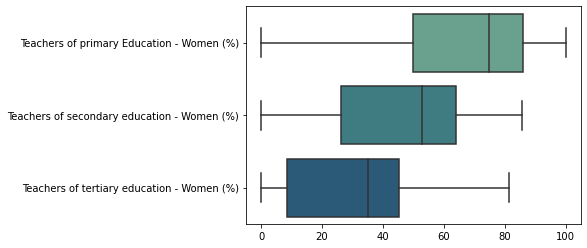

In [627]:
sns.boxplot(data = newTeaching, palette = 'crest', orient= 'h', width=0.8)

In [628]:
newTeaching[newTeaching['Teachers of tertiary education - Women (%)'] > 65]

,Country or area,Teachers of primary Education - Women (%),Teachers of secondary education - Women (%),Teachers of tertiary education - Women (%)
43,Colombia,78.68,50.66,65.65
112,Maldives,72.03,34.67,66.67
125,Myanmar,83.85,85.13,81.32
181,Thailand,59.98,51.45,68.68


There is only 1 extreme in Myanmar country reaching 81% teachers in the tertiary education. but, the value cant be capped beacause it may be needed in future analyzation.

Finally, w'll check for duplicates

In [629]:
TeachingStaff.duplicated().sum()

0

No duplicates

### Final dataset: 

In [630]:
TeachingStaff

,Country or area,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
1,Afghanistan,2011,31.00,2007,27.59,2009,15.53
2,Albania,2011,82.81,2011,63.22,2011,50.53
3,Algeria,2011,54.92,0,0.00,2011,39.20
4,Andorra,2011,78.52,2005,59.34,2009,61.06
5,Angola,2007,40.00,2001,30.02,2010,28.75
...,...,...,...,...,...,...,...
201,Venezuela (Bolivarian Republic of),0,0.00,0,0.00,2008,34.00
202,Viet Nam,2011,77.12,1998,64.07,2011,47.41
203,Yemen,2011,27.39,2011,29.27,2007,17.14
204,Zambia,2011,51.17,0,0.00,0,0.00


## Final indicator on part-time employment percentages 

In [631]:
PartTimeEmployment = pd.read_excel('Part-time employment.xls')
PartTimeEmployment

,Table 5b. Part-time employment,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Latest update: June 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Percentage of adult employment that is part-time,NaN,Women's share of part-time employment,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Country or area,Year,NaN,NaN,Women,Men,%,Source
...,...,...,...,...,...,...,...,...
95,Turkey,2011,NaN,"l,b,f,m",24.299999,6.6,60,LFS
96,United Kingdom,2011,NaN,"b,f,d",39.299999,11.7,74.699997,ELFS
97,Uruguay,2010,NaN,"e,f,g,v",27.799999,12.8,64.900002,HS
98,"Venezuela, Bolivarian Republic of",2010,NaN,"e,f,g",16.4,6.5,61.700001,HS


This is the data frame after reading it from the file.

First we will drop unneeded columns and rows:

In [632]:
PartTimeEmployment.drop(['Unnamed: 2'], axis= 1, inplace = True)
PartTimeEmployment.drop(['Unnamed: 7'], axis= 1, inplace = True)
PartTimeEmployment.drop(['Unnamed: 3'], axis= 1, inplace = True)

In [633]:
PartTimeEmployment.drop([0,1,2,3,4], axis= 0, inplace = True)

In [634]:
PartTimeEmployment

,Table 5b. Part-time employment,Unnamed: 1,Unnamed: 4,Unnamed: 5,Unnamed: 6
5,Albania,2001,50.200001,46.099998,39.700001
6,Argentina,2011,31.299999,11.9,64.800003
7,Armenia,2008,30.1,19,56.200001
8,Aruba,1994,12.3,4,71
9,Australia,2011,38.5,13.2,70.900002
...,...,...,...,...,...
95,Turkey,2011,24.299999,6.6,60
96,United Kingdom,2011,39.299999,11.7,74.699997
97,Uruguay,2010,27.799999,12.8,64.900002
98,"Venezuela, Bolivarian Republic of",2010,16.4,6.5,61.700001


Then we rename the columns of the dataframe and reset the index to start from 1:

In [635]:
PartTimeEmployment.columns = ['Country or area', 'Year' ,'Part-time adult employment (%) - Women' , 'Part-time adult employment (%) - Men', 'Women\'s share of part-time employment (%)']

In [636]:
PartTimeEmployment.reset_index()

,index,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
0,5,Albania,2001,50.200001,46.099998,39.700001
1,6,Argentina,2011,31.299999,11.9,64.800003
2,7,Armenia,2008,30.1,19,56.200001
3,8,Aruba,1994,12.3,4,71
4,9,Australia,2011,38.5,13.2,70.900002
...,...,...,...,...,...,...
90,95,Turkey,2011,24.299999,6.6,60
91,96,United Kingdom,2011,39.299999,11.7,74.699997
92,97,Uruguay,2010,27.799999,12.8,64.900002
93,98,"Venezuela, Bolivarian Republic of",2010,16.4,6.5,61.700001


In [637]:
PartTimeEmployment.index = PartTimeEmployment.index - 4

In [638]:
PartTimeEmployment

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
1,Albania,2001,50.200001,46.099998,39.700001
2,Argentina,2011,31.299999,11.9,64.800003
3,Armenia,2008,30.1,19,56.200001
4,Aruba,1994,12.3,4,71
5,Australia,2011,38.5,13.2,70.900002
...,...,...,...,...,...
91,Turkey,2011,24.299999,6.6,60
92,United Kingdom,2011,39.299999,11.7,74.699997
93,Uruguay,2010,27.799999,12.8,64.900002
94,"Venezuela, Bolivarian Republic of",2010,16.4,6.5,61.700001


In [639]:
PartTimeEmployment.dtypes

Country or area                              object
Year                                         object
Part-time adult employment (%) - Women       object
Part-time adult employment (%) - Men         object
Women's share of part-time employment (%)    object
dtype: object

Now we should change the data types of the column to correspond correctly with the data, but before we do that we must replace the '...' with nulls 

so, we replace each '...' with null value and check for the nulls again:

In [640]:
PartTimeEmployment = PartTimeEmployment.replace('…', np.NaN) 

In [641]:
PartTimeEmployment['Part-time adult employment (%) - Women'] = PartTimeEmployment['Part-time adult employment (%) - Women'].astype(float)

In [642]:
PartTimeEmployment['Part-time adult employment (%) - Men'] =PartTimeEmployment['Part-time adult employment (%) - Men'].astype(float)

In [643]:
PartTimeEmployment['Women\'s share of part-time employment (%)'] = PartTimeEmployment['Women\'s share of part-time employment (%)'] .astype(float)

In [644]:
PartTimeEmployment.dtypes

Country or area                               object
Year                                           int64
Part-time adult employment (%) - Women       float64
Part-time adult employment (%) - Men         float64
Women's share of part-time employment (%)    float64
dtype: object

All data types are correct. 

In [645]:
PartTimeEmployment.isna().sum()

Country or area                              0
Year                                         0
Part-time adult employment (%) - Women       0
Part-time adult employment (%) - Men         0
Women's share of part-time employment (%)    2
dtype: int64

We need to check if there any rows that contain only null values. if found we will drop them as a way of cleaning the data.

To do this we need to copy the rows with only null values in another dataframe:

In [646]:
nullRows = PartTimeEmployment[PartTimeEmployment[['Part-time adult employment (%) - Women','Part-time adult employment (%) - Men','Women\'s share of part-time employment (%)']].isna().all(axis=1)]
nullRows

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)


There are no rows with complete null values

Now will use the next line of code to see the null values of this particular column: 

In [647]:
PartTimeEmployment[PartTimeEmployment.isnull().any(axis=1)]

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
14,Bosnia and Herzegovina,2011,11.6,9.6,NaN
78,Samoa,2008,1.2,1.8,NaN


To impute the nulls, we will assume that the ratio between women and men in these two countries is 50% to 50% and calculate the ratio between the women's adult part time employment percentage and the men's percentage, then we will use is ratio to replace the nulls.

In [648]:
Ratio14 = (11.6 /(11.6 + 9.6))*100
print(Ratio14)

Ratio78 = (1.2/(1.2+1.8)) * 100
print(Ratio78)

54.71698113207547
40.0


In [649]:
PartTimeEmployment.loc[14,"Women's share of part-time employment (%)"] = Ratio14

In [650]:
PartTimeEmployment.loc[78,"Women's share of part-time employment (%)"] = Ratio78

In [651]:
PartTimeEmployment.iloc[13 : 78]

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
14,Bosnia and Herzegovina,2011,11.6,9.600000,54.716981
15,Botswana,2006,15.4,11.700000,54.700001
16,Brazil,2009,28.1,10.100000,67.500000
17,British Virgin Islands,1991,14.2,7.800000,58.599998
18,Bulgaria,2011,2.6,2.100000,52.500000
...,...,...,...,...,...
74,Réunion,2012,34.7,16.600000,64.300000
75,Romania,2011,11.5,9.600000,49.500000
76,Russian Federation,2011,5.4,2.800000,65.300003
77,Saint Vincent and the Grenadines,2001,21.0,18.799999,41.099998


Finally we need to round the percentages for more accurate numbers:

In [652]:
PartTimeEmployment = PartTimeEmployment.round(2)

Now we take a look at the outliers of the dataset:

but first, we should copy the column we need to seperate into a new dataframe to avoid errors in the boxplot.

In [653]:
newPartTime = PartTimeEmployment[['Part-time adult employment (%) - Women','Part-time adult employment (%) - Men','Women\'s share of part-time employment (%)']].copy()

<AxesSubplot:>

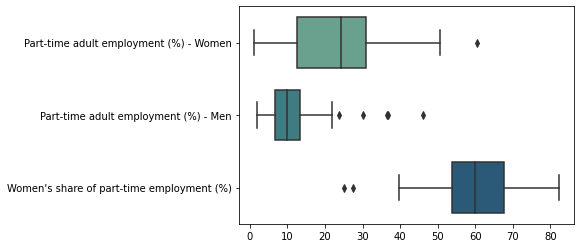

In [654]:
sns.boxplot(data=newPartTime , orient ='h', palette='crest', width = 0.7)

In [655]:
PartTimeEmployment[PartTimeEmployment['Part-time adult employment (%) - Women'] >= 50]

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
1,Albania,2001,50.2,46.1,39.7
38,Georgia,2004,50.5,36.5,56.2
63,Netherlands,2011,60.5,17.1,75.3


In [656]:
PartTimeEmployment[PartTimeEmployment['Part-time adult employment (%) - Men'] >= 20]

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
1,Albania,2001,50.2,46.1,39.7
38,Georgia,2004,50.5,36.5,56.2
41,Grenada,1998,35.5,30.2,45.6
59,Mauritius,2004,39.1,23.8,44.4
66,Nicaragua,2010,43.0,21.0,59.1
73,Republic of Moldova,2004,31.9,21.8,61.3
89,Tonga,2003,44.2,36.9,45.3


In [657]:
PartTimeEmployment[PartTimeEmployment['Women\'s share of part-time employment (%)'] < 30]

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
9,Bahrain,2004,2.8,2.2,25.1
86,Syrian Arab Republic,2010,13.3,6.6,27.4


All of these values are extremes but not outliers. and will be needed in future for answering questions.

Therefore, they are not going to be dropped or capped because of the data sensitivity. 

Finally, w'll check for duplicates

In [658]:
PartTimeEmployment.duplicated().sum()

0

No duplicates

### Final Dataset:

In [659]:
PartTimeEmployment

,Country or area,Year,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
1,Albania,2001,50.2,46.1,39.7
2,Argentina,2011,31.3,11.9,64.8
3,Armenia,2008,30.1,19.0,56.2
4,Aruba,1994,12.3,4.0,71.0
5,Australia,2011,38.5,13.2,70.9
...,...,...,...,...,...
91,Turkey,2011,24.3,6.6,60.0
92,United Kingdom,2011,39.3,11.7,74.7
93,Uruguay,2010,27.8,12.8,64.9
94,"Venezuela, Bolivarian Republic of",2010,16.4,6.5,61.7


# Data Visualization and Interpretation

### Question 1: Does young marriage affect the percentage of female teachers in the education field?

Will be calculated by analyzing the percentages of young married girls in
different countries, showing the relation between early marriage and the
percentage of the female teachers in the same countries. Girls married at a young
age most likely will not complete their education to be able to work in the educational field.


For this question 2 datasets will be used, the Marriages dataset and the women teaching staff % dataset

The 2 datasets must provide data on the same countries, so they must be joined based on the country column

In [660]:
YoungMarriageAndTeachingStaff = pd.merge(Marriages,TeachingStaff, 'inner', on = 'Country or area' )

In [661]:
YoungMarriageAndTeachingStaff 

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men,year,Teachers of primary Education - Women (%),year,Teachers of secondary education - Women (%),year,Teachers of tertiary education - Women (%)
0,Afghanistan,17.3,2.074619,21.5,28.753807,2011,31.00,2007,27.59,2009,15.53
1,Albania,7.2,2.000000,25.1,29.200000,2011,82.81,2011,63.22,2011,50.53
2,Algeria,1.8,0.200000,29.5,33.000000,2011,54.92,0,0.00,2011,39.20
3,Angola,35.7,7.600000,19.4,24.500000,2007,40.00,2001,30.02,2010,28.75
4,Anguilla,1.5,0.000000,28.6,31.600000,2011,74.77,2011,67.74,2008,42.86
...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela (Bolivarian Republic of),17.1,5.100000,22.7,26.000000,0,0.00,0,0.00,2008,34.00
188,Viet Nam,9.9,2.600000,22.7,26.200000,2011,77.12,1998,64.07,2011,47.41
189,Yemen,17.2,3.100000,22.2,25.400000,2011,27.39,2011,29.27,2007,17.14
190,Zambia,19.4,1.200000,21.1,25.500000,2011,51.17,0,0.00,0,0.00


Not all columns are needed for answering this question, so the uneeded columns will be dropped

In [662]:
YoungMarriageAndTeachingStaff .drop(['Population aged 15-19 ever married (%) / Men','Singulate mean age at marraige / Women','Singulate mean age at marraige / Men', 'year'], axis =1, inplace = True)

In [663]:
YoungMarriageAndTeachingStaff.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Teachers of primary Education - Women (%),Teachers of secondary education - Women (%),Teachers of tertiary education - Women (%)
0,Afghanistan,17.3,31.00,27.59,15.53
1,Albania,7.2,82.81,63.22,50.53
2,Algeria,1.8,54.92,0.00,39.20
3,Angola,35.7,40.00,30.02,28.75
4,Anguilla,1.5,74.77,67.74,42.86


In [664]:
YoungMarriageAndTeachingStaff.shape

(192, 5)

Countries with a percentage of women ever married between 15-19 greater than 30% have a less chance of completing their education and being able to work in the educational field.

In [665]:
highRateOfYoungMarriage = YoungMarriageAndTeachingStaff [YoungMarriageAndTeachingStaff['Population aged 15-19 ever married (%) / Women'] > 30]

In [666]:
highRateOfYoungMarriage

,Country or area,Population aged 15-19 ever married (%) / Women,Teachers of primary Education - Women (%),Teachers of secondary education - Women (%),Teachers of tertiary education - Women (%)
3,Angola,35.7,40.00,30.02,28.75
13,Bangladesh,45.7,53.73,21.54,17.06
27,Burkina Faso,32.4,37.65,16.52,8.41
34,Central African Republic,42.4,17.56,11.93,9.38
35,Chad,45.3,15.30,7.44,3.71
57,Eritrea,31.1,40.55,14.55,14.45
64,Gambia,38.8,28.63,0.00,16.42
72,Guinea,37.9,29.68,5.57,3.52
102,Madagascar,39.9,55.81,44.67,31.06
106,Mali,52.6,28.05,10.53,0.00


<AxesSubplot:xlabel='Country or area', ylabel='Percentage'>

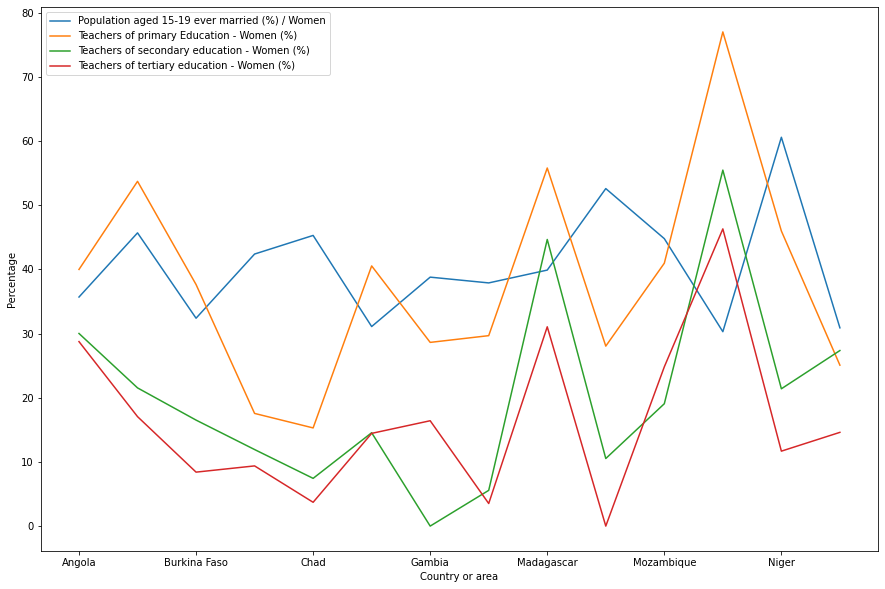

In [667]:
highRateOfYoungMarriage.plot(x= 'Country or area', ylabel = 'Percentage', figsize=(15,10))

As the line plot shows, countries with high percentage of young married women have a lower percentage of women that work in the educational field in the primary, secondary, and tertiary levels. Eventhough some of the countries have a high percentage of women working as teaching staff in the primary education level, their percentages in the secondary and tertiary education level is low which indicates that women in these countries don't qualify enough to teach in these level. As a result, it can be concluded that young marriage hinders women's chance in acquiring jobs in the educational field. 

### Question 3: Is the women's share in part-time employment higher in most countries than men?
       a. Are the regions with the highest share of women in part-time employment linked
          with a relatively high percentage of women illiteracy?


Will be answered by analyzing the data set of the part-time employment
in each country and comparing the ratio of men to women in part-time jobs, and
to additional data sets about women illiteracy in the same countries, to find a
relation between the two data sets.


For this question 2 datasets will be used, the part- time employment dataset and the illiteracy dataset

The 2 datasets must provide data on the same countries, so they must be joined based on the country column

In [668]:
WomenPartTimeEmployment = pd.merge(illiteracy,PartTimeEmployment,'inner', on = 'Country or area' )
WomenPartTimeEmployment.head()

,Country or area,Year_x,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)",Year_y,Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
0,Botswana,2000-2004,7.2,14.5,2006,15.4,11.7,54.7
1,Ethiopia,2000-2004,48.2,37.0,2004,28.4,16.8,56.2
2,Madagascar,2000,31.9,27.6,2001,27.0,17.5,59.3
3,Mauritius,2000,4.6,6.3,2004,39.1,23.8,44.4
4,Namibia,2001,6.5,8.8,1997,26.5,8.4,70.6


In [669]:
WomenPartTimeEmployment.shape

(55, 8)

The "Illiteracy rate (%), population aged 15-24 (Men)" and "Year" columns not needed in this analysis, so we can drop it

In [670]:
WomenPartTimeEmployment.drop(['Illiteracy rate (%), population aged 15-24 (Men)', 'Year_x','Year_y'], axis =1, inplace = True)

First, we need to find if the women's share in part-time employment higher in most countries than men

In [671]:
WomenPartTimeEmployment['Part-time adult employment (%) - Women'].mean()

21.643636363636368

In [672]:
WomenPartTimeEmployment['Part-time adult employment (%) - Men'].mean()

11.627272727272729

By comparing the 2 means together, it is clear that women's share of part-time employment is higher than men.

To further study the case, we will create a test sample that includes a group of countries with the highest percentage of women's share in part-time employment, then compare women's share with men's share.

In [673]:
TestGroup = WomenPartTimeEmployment[WomenPartTimeEmployment["Women's share of part-time employment (%)"] >= 50]

In [674]:
TestGroup.shape

(44, 5)

In [675]:
TestGroup

,Country or area,"Illiteracy rate (%), population aged 15-24 (Women)",Part-time adult employment (%) - Women,Part-time adult employment (%) - Men,Women's share of part-time employment (%)
0,Botswana,7.2,15.4,11.7,54.70
1,Ethiopia,48.2,28.4,16.8,56.20
2,Madagascar,31.9,27.0,17.5,59.30
4,Namibia,6.5,26.5,8.4,70.60
5,Réunion,0.3,34.7,16.6,64.30
6,South Africa,5.6,11.2,5.0,63.20
7,Zimbabwe,3.8,21.0,17.0,53.90
9,Costa Rica,1.3,27.8,11.4,59.50
10,Dominican Republic,5.0,16.4,11.8,50.50
11,El Salvador,11.9,23.4,14.8,53.60


In [676]:
TestGroup[TestGroup["Part-time adult employment (%) - Women"] > TestGroup["Part-time adult employment (%) - Men"] ].shape

(44, 5)

All the countries within the test group appear to have a higher percentage of women inpart-time jobs. 

To visualize that:

In [677]:
TestGroupPlot = TestGroup.drop(['Illiteracy rate (%), population aged 15-24 (Women)',"Women's share of part-time employment (%)"], axis =1)

<AxesSubplot:title={'center':'Part-time employment men/women'}, xlabel='Country or area'>

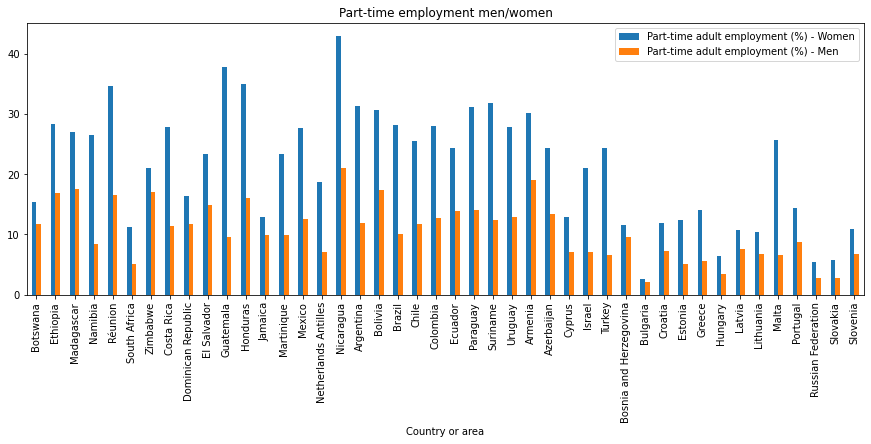

In [678]:
TestGroupPlot.plot( x = 'Country or area', title = 'Part-time employment men/women', kind = 'bar', figsize= (15,5))

This bar graph represent the percentage of adult women and Men's share of part-time employment, as it shows, women's share of part-time employment is higher than men, which proves our main goal. 

Now we need to find if there is a correlation between these high percentages and women illiteracy in these countries

In [679]:
TestGroupIlliteracy = TestGroup.drop(['Part-time adult employment (%) - Women','Part-time adult employment (%) - Men'],axis =1)

<AxesSubplot:xlabel='Contry or Area', ylabel='Percentage'>

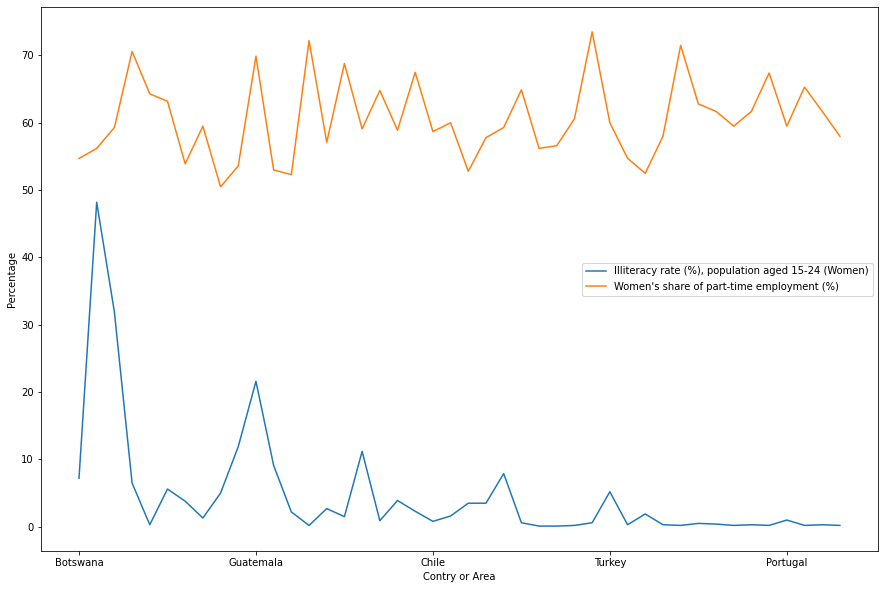

In [680]:
TestGroupIlliteracy.plot(ylabel = "Percentage", x= 'Country or area', xlabel = "Contry or Area", figsize=(15,10))

As the line plot illustrates, illiteracy and women's share of part-time employment don't show a direct relation, as many of the countries that have a low percentage of illiteracy have a high percentage of women's share of part-time employment. this finding proves our sub goal wrong but raises a question on what could be the reason for women having the highest share of part-time employment within their populations. 

### Question 5:  Does young marriage hinder women’s chance of acquiring jobs in the legislature and managerial fields?



Can be proven by analyzing the women legislators and manager percentages in each country in comparison with the percentage of young girls married at the same countries.

so we need marriage and Women legislators and managers datasets combined

In [681]:
YoungMarriageAndWomen = Marriages.merge(WomenLegislators , on = 'Country or area')

Firstly, we drop the unneeded column of the men:

 

In [682]:
YoungMarriageAndWomen

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men,"Women's share of legislators, senior officials and managers (%)"
0,Algeria,1.8,0.2,29.5,33.0,4.870624
1,Anguilla,1.5,0.0,28.6,31.6,52.032520
2,Antigua and Barbuda,3.9,1.0,25.7,29.3,45.059786
3,Argentina,12.9,6.0,24.6,26.6,23.120202
4,Armenia,8.4,1.0,24.4,27.8,23.939559
...,...,...,...,...,...,...
111,United Kingdom,0.4,0.1,31.8,33.2,34.598508
112,United Republic of Tanzania,19.7,4.5,21.0,25.1,16.469456
113,Uruguay,11.3,3.3,24.8,27.0,40.274600
114,Viet Nam,9.9,2.6,22.7,26.2,22.177083


In [683]:
YoungMarriageAndWomen.drop(['Population aged 15-19 ever married (%) / Men'], axis= 1, inplace = True)
YoungMarriageAndWomen.drop(['Singulate mean age at marraige / Men'], axis= 1, inplace = True)
YoungMarriageAndWomen.drop(['Singulate mean age at marraige / Women'], axis=1 , inplace=True)

In [684]:
YoungMarriageAndWomen

,Country or area,Population aged 15-19 ever married (%) / Women,"Women's share of legislators, senior officials and managers (%)"
0,Algeria,1.8,4.870624
1,Anguilla,1.5,52.032520
2,Antigua and Barbuda,3.9,45.059786
3,Argentina,12.9,23.120202
4,Armenia,8.4,23.939559
...,...,...,...
111,United Kingdom,0.4,34.598508
112,United Republic of Tanzania,19.7,16.469456
113,Uruguay,11.3,40.274600
114,Viet Nam,9.9,22.177083


Secondly, set the index to start from 1:

In [685]:
YoungMarriageAndWomen.index = YoungMarriageAndWomen.index+1

We will check for null values before working with the dataset:

In [686]:
YoungMarriageAndWomen.isna().sum()

Country or area                                                    0
Population aged 15-19 ever married (%) / Women                     0
Women's share of legislators, senior officials and managers (%)    0
dtype: int64

In [687]:
YoungMarriageAndWomen.dtypes

Country or area                                                     object
Population aged 15-19 ever married (%) / Women                     float64
Women's share of legislators, senior officials and managers (%)    float64
dtype: object

In [688]:
P_marriage = YoungMarriageAndWomen[YoungMarriageAndWomen['Population aged 15-19 ever married (%) / Women'] > 20]

<AxesSubplot:xlabel='Country or area', ylabel='Percentage'>

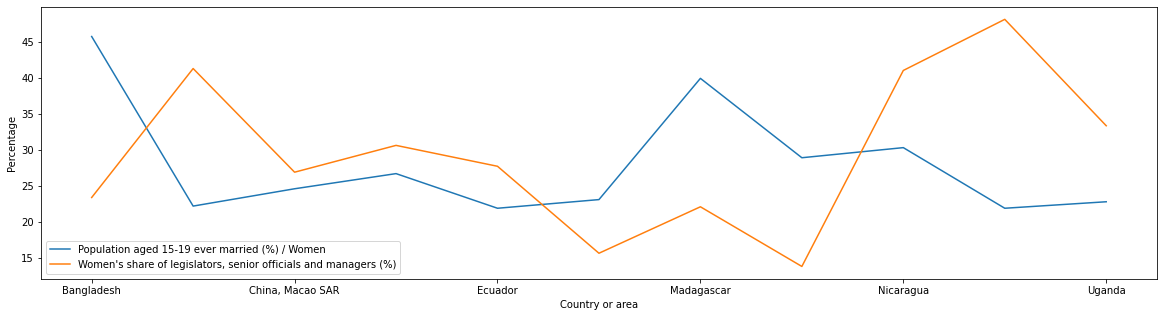

In [689]:
P_marriage.plot(x= 'Country or area', ylabel = 'Percentage', figsize=(20,5))

As the plot illustrates, there is a negative correlation between the percentage of women married between the age 15-19 and the percentage of women that are legislators and managers within the same country. Countries with a high percentage of young marriage have a low percentage of women as legislators and managers, from that, it can be concluded that young marriage hinders women's chances of becoming legislators or managers. 

### Question 8: What countries have a percentage of married people under the countries’ legal age of marriage?

This question will need the combined data from the sets Marriages and Legal Age for Marriage. These two will be joined on the Country or area column, as we want to use the countries that have data in both dataframes.

In [690]:
UnderLegalAge = LegalAgeForMarriage.merge(Marriages, on = 'Country or area')
UnderLegalAge.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
0,Afghanistan,16.000000,18.000000,15.00000,16.420635,17.3,2.074619,21.5,28.753807
1,Albania,17.937811,18.396552,16.00000,18.000000,7.2,2.000000,25.1,29.200000
2,Algeria,19.000000,19.000000,15.72963,16.420635,1.8,0.200000,29.5,33.000000
3,Angola,18.000000,18.000000,15.00000,16.000000,35.7,7.600000,19.4,24.500000
4,Anguilla,18.000000,18.000000,15.72963,16.420635,1.5,0.000000,28.6,31.600000


In [691]:
UnderLegalAge.shape

(135, 9)

In [692]:
LegalAgeForMarriage.shape

(207, 5)

In [693]:
Marriages.shape

(217, 5)

We do not need the singulate mean age at marriage for this insight, so it can be dropped.

In [694]:
UnderLegalAge.drop(['Singulate mean age at marraige / Women','Singulate mean age at marraige / Men'], axis = 1, inplace = True)

A simple scatter plot is used to get a feel of the values that exist.

<AxesSubplot:xlabel='Without Parental Consent / Women', ylabel='With Parental Consent / Women'>

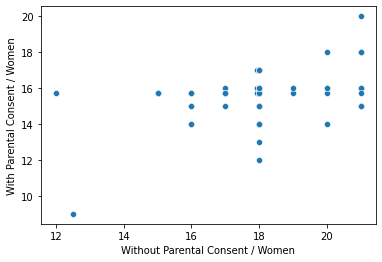

In [695]:
sns.scatterplot(data = UnderLegalAge, x='Without Parental Consent / Women', y='With Parental Consent / Women')

Checking for the nulls in the data for women that can be seen in the plot above:

In [696]:
UnderLegalAge.loc[UnderLegalAge['Without Parental Consent / Women'] == -1, 'Without Parental Consent / Women'].count()

0

In [697]:
UnderLegalAge.loc[UnderLegalAge['With Parental Consent / Women'] == -1, 'With Parental Consent / Women'].count()

0

The same will be done for the data on men.

<AxesSubplot:xlabel='Without Parental Consent / Men', ylabel='With Parental Consent / Men'>

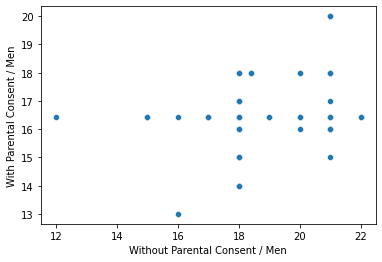

In [698]:
sns.scatterplot(data = UnderLegalAge, x='Without Parental Consent / Men', y='With Parental Consent / Men')

In [699]:
UnderLegalAge.loc[UnderLegalAge['Without Parental Consent / Men'] == -1, 'Without Parental Consent / Men'].count()

0

In [700]:
UnderLegalAge.loc[UnderLegalAge['With Parental Consent / Men'] == -1, 'With Parental Consent / Men'].count()

0

To be able to compare to the legal age of marriage, we will take the minimum age between with and without parental consent. To make sure the nulls seen above are not taken, they will be imputed with an unreasonably high number instead of -1.

In [701]:
UnderLegalAge = UnderLegalAge.replace(-1, 200)

In [702]:
UnderLegalAge['Legal Age / Women'] = np.where(UnderLegalAge['Without Parental Consent / Women'] < UnderLegalAge['With Parental Consent / Women'], UnderLegalAge['Without Parental Consent / Women'],UnderLegalAge['With Parental Consent / Women'])

In [703]:
UnderLegalAge.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Legal Age / Women
0,Afghanistan,16.000000,18.000000,15.00000,16.420635,17.3,2.074619,15.00000
1,Albania,17.937811,18.396552,16.00000,18.000000,7.2,2.000000,16.00000
2,Algeria,19.000000,19.000000,15.72963,16.420635,1.8,0.200000,15.72963
3,Angola,18.000000,18.000000,15.00000,16.000000,35.7,7.600000,15.00000
4,Anguilla,18.000000,18.000000,15.72963,16.420635,1.5,0.000000,15.72963


In [704]:
UnderLegalAge['Legal Age / Men'] = np.where(UnderLegalAge['Without Parental Consent / Men'] < UnderLegalAge['With Parental Consent / Men'], UnderLegalAge['Without Parental Consent / Men'],UnderLegalAge['With Parental Consent / Men'])

In [705]:
UnderLegalAge.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Legal Age / Women,Legal Age / Men
0,Afghanistan,16.000000,18.000000,15.00000,16.420635,17.3,2.074619,15.00000,16.420635
1,Albania,17.937811,18.396552,16.00000,18.000000,7.2,2.000000,16.00000,18.000000
2,Algeria,19.000000,19.000000,15.72963,16.420635,1.8,0.200000,15.72963,16.420635
3,Angola,18.000000,18.000000,15.00000,16.000000,35.7,7.600000,15.00000,16.000000
4,Anguilla,18.000000,18.000000,15.72963,16.420635,1.5,0.000000,15.72963,16.420635


Now that an overall legal age for both the men and women has been obtained, the old columns regarding parental consent can be removed.

In [706]:
UnderLegalAge.drop(['Without Parental Consent / Women','Without Parental Consent / Men','With Parental Consent / Women','With Parental Consent / Men'], axis = 1, inplace = True)
UnderLegalAge.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Legal Age / Women,Legal Age / Men
0,Afghanistan,17.3,2.074619,15.00000,16.420635
1,Albania,7.2,2.000000,16.00000,18.000000
2,Algeria,1.8,0.200000,15.72963,16.420635
3,Angola,35.7,7.600000,15.00000,16.000000
4,Anguilla,1.5,0.000000,15.72963,16.420635


We would like to extract the countries in which the legal age for marriage is above 19, as in those cases no occurrances of marriage between the ages of 15 and 19 should exist.

In [707]:
over19w = UnderLegalAge[UnderLegalAge['Legal Age / Women']>19]
over19w


,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Legal Age / Women,Legal Age / Men
107,Rwanda,3.7,0.2,20.0,20.0


In [708]:
over19m = UnderLegalAge[UnderLegalAge['Legal Age / Men']>19]
over19m

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Legal Age / Women,Legal Age / Men
21,Burundi,9.9,1.6,17.0,20.0
33,Congo,19.9,2.8,17.0,20.0
107,Rwanda,3.7,0.2,20.0,20.0


A side by side view of the countries and their population married percentage for men and women:

<AxesSubplot:title={'center':'Women'}, xlabel='Country or area', ylabel='Population aged 15-19 ever married (%)'>

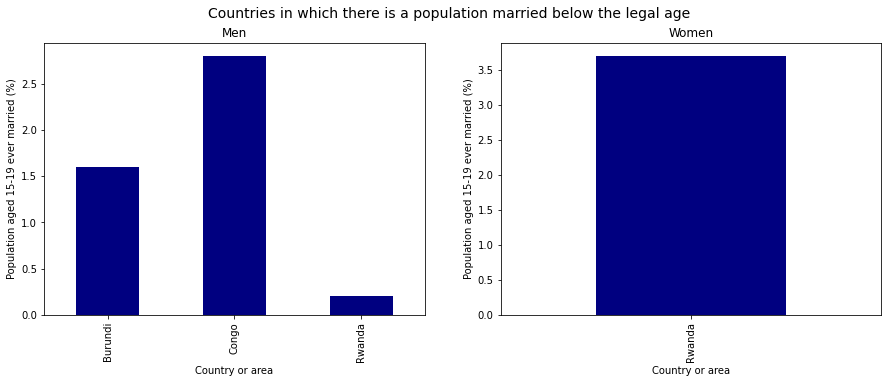

In [709]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Countries in which there is a population married below the legal age', fontsize=14)
over19m.plot(y='Population aged 15-19 ever married (%) / Men', ylabel = 'Population aged 15-19 ever married (%)', x = 'Country or area', color = 'navy', title = 'Men', kind = 'bar', ax=ax1, legend = False)

over19w.plot(y='Population aged 15-19 ever married (%) / Women', ylabel = 'Population aged 15-19 ever married (%)', x = 'Country or area', color = 'navy', title = 'Women', kind = 'bar', ax=ax2, legend = False)


These countries with instances of below-legal marriage of both men and women will be joined.

In [710]:
joinedCountries = pd.merge(over19m, over19w,'outer')
joinedCountries

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Legal Age / Women,Legal Age / Men
0,Burundi,9.9,1.6,17.0,20.0
1,Congo,19.9,2.8,17.0,20.0
2,Rwanda,3.7,0.2,20.0,20.0


We would like to create a world map of the countries above.

In [711]:
import pygal
from pygal_maps_world.maps import World


In [712]:
from pygal.style import Style
custom = Style(colors=('#05566d', '#81c6b8', '#0a5133','#007777','#c1bbdd','#4951a5','#3b0d6a','#a079c8','#504460','#060c4a'))

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

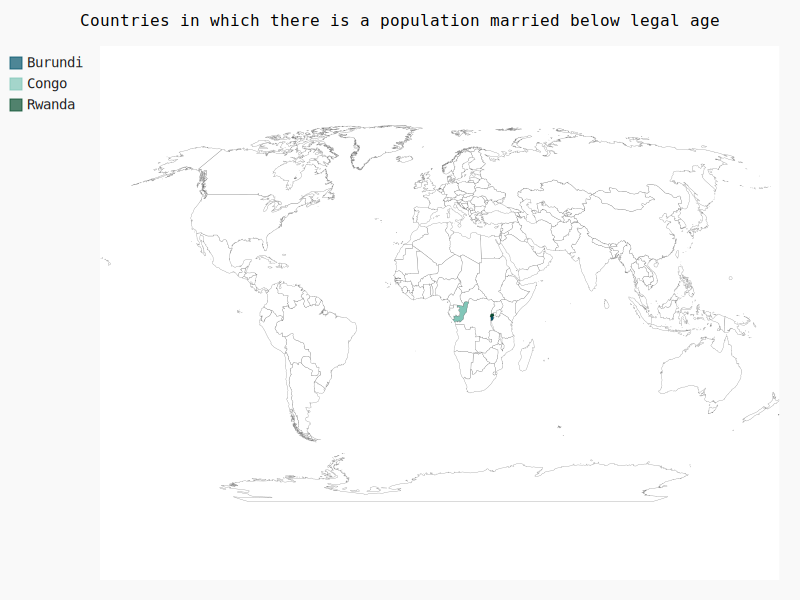

In [713]:
worldmap = World(style=custom)
worldmap.title = 'Countries in which there is a population married below legal age'
worldmap.add('Burundi',[('bi',1)])
worldmap.add('Congo',[('cg',1)])
worldmap.add('Rwanda',[('rw',1)])

The map shows 10 countries in which marriages of either men or women aged 15-19 have been recorded, even though their legal age of marriage is above the age of 19 specified in the range. These results show implications of illegal young marriage in these countries, and perhaps further cases in other countries could be detected by using marriage age data not in a range (15-19) but in discrete ages (15,16,17,etc.). Furthermore, there may not even be data collected about many of the young marriages that take place, so these results open a door into further investigation. 

# Web Scraping 

To answer the rest of our goals, we will scrape data off the web and integrate it with the datasets we have.

# Final Questions

### Question 2:  Is the legal age of marriage much lower with parental consent? (especially in women)
         a. Can this increase early marriage without the consent the girl's consent?


 Will be calculated by analyzing the legal age of marriage for women and
men from the data sets and additional data that is yet to be added about forced
marriage in different countries.


First, we need data on the percentage of child marriage with in countries which is considered forced marriage.

we will scrape this data from https://en.wikipedia.org/wiki/Forced_marriage#Statistics

In [714]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
url='https://en.wikipedia.org/wiki/Forced_marriage#Statistics'
forcedMarriage = requests.get(url,headers=headers)

In [715]:
forcedMarriage_text = forcedMarriage.text
forcedMarriage_page = BeautifulSoup(forcedMarriage_text,'html.parser')

In [716]:
forcedMarriage_page.prettify()[:3000]

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Forced marriage - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e05ea50b-5016-41e5-a709-fb6839e8730f","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Forced_marriage","wgTitle":"Forced marriage","wgCurRevisionId":1084908996,"wgRevisionId":1084908996,"wgArticleId":2277678,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","CS1 maint: archived copy as title","Webarchive template wayback links","All articles wi

We need to know if the webpage tables are written in table tags or paragraphs, so we will extract all the html tags

In [717]:
regextags = '<[a-z]+>'
tags = re.findall(regextags,forcedMarriage_text)
print(tags)

['<head>', '<title>', '<script>', '<script>', '<tbody>', '<tr>', '<tr>', '<tr>', '<tr>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<tr>', '<tr>', '<ul>', '<li>', '<li>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<li>', '<ul>', '<li>', '<li>', '<li>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<li>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<tr>', '<tr>', '<ul>', '<li>', '<li>', '<li>', '<ul>', '<li>', '<li>', '<li>', '<tr>', '<tr>', '<ul>', '<li>', '<li>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<i>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<i>', '<li>', '<tr>', '<tr>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<tr>', '<tr>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<tr>', '<ul>', '<i>', '<i>', '<i>', '<tbody>', '<tr>', '<tr>', '<tr>', '<ul>', '<li>', '<li>', '<li>', '<li>', '<li>', '<li>', '<tr>', '<ul>', '<li>', '

By inspecting the webpage html, we found the class of the div that contains the table we need

In [718]:
class_='mw-parser-output'
forcedMarriageTableDiv = forcedMarriage_page.find('div',attrs={'class':class_})
forcedMarriageTableDiv

<div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">Being marriage without consenting</div>
<p class="mw-empty-elt">
</p>
<style data-mw-deduplicate="TemplateStyles:r1045330069">.mw-parser-output .sidebar{width:22em;float:right;clear:right;margin:0.5em 0 1em 1em;background:#f8f9fa;border:1px solid #aaa;padding:0.2em;text-align:center;line-height:1.4em;font-size:88%;border-collapse:collapse;display:table}body.skin-minerva .mw-parser-output .sidebar{display:table!important;float:right!important;margin:0.5em 0 1em 1em!important}.mw-parser-output .sidebar-subgroup{width:100%;margin:0;border-spacing:0}.mw-parser-output .sidebar-left{float:left;clear:left;margin:0.5em 1em 1em 0}.mw-parser-output .sidebar-none{float:none;clear:both;margin:0.5em 1em 1em 0}.mw-parser-output .sidebar-outer-title{padding:0 0.4em 0.2em;font-size:125%;line-height:1.2em;font-weight:bold}.mw-parser-output .sidebar-top-image{padding:0.4em}.mw-parser-out

Then, we will extract the table it self.

In [719]:
tableClass='wikitable sortable'
forcedMarriagetables = forcedMarriage_page.find('table',attrs={'class':tableClass})
forcedMarriagetables

<table class="wikitable sortable">
<tbody><tr>
<th>Country
</th>
<th>Married by 15
</th>
<th>Married by 18
</th>
<th>Source
</th></tr>
<tr>
<td>Afghanistan
</td>
<td>–
</td>
<td>33%
</td>
<td>Living Conditions Survey 2013-2013
</td></tr>
<tr>
<td>Albania
</td>
<td>0%
</td>
<td>10%
</td>
<td>DHS 2008–2009
</td></tr>
<tr>
<td>Algeria
</td>
<td>0%
</td>
<td>3%
</td>
<td>MICS 2012–2013
</td></tr>
<tr>
<td>Armenia
</td>
<td>0%
</td>
<td>7%
</td>
<td>DHS 2010
</td></tr>
<tr>
<td>Azerbaijan
</td>
<td>2%
</td>
<td>11%
</td>
<td>DHS 2011
</td></tr>
<tr>
<td>Bangladesh
</td>
<td>18%
</td>
<td>52%
</td>
<td>MICS 2012–2013
</td></tr>
<tr>
<td>Barbados
</td>
<td>1%
</td>
<td>11%
</td>
<td>MICS 2012
</td></tr>
<tr>
<td>Belarus
</td>
<td>0%
</td>
<td>3%
</td>
<td>MICS 2012
</td></tr>
<tr>
<td>Belize
</td>
<td>3%
</td>
<td>26%
</td>
<td>MICS 2011
</td></tr>
<tr>
<td>Benin
</td>
<td>11%
</td>
<td>32%
</td>
<td>DHS 2011–2012
</td></tr>
<tr>
<td>Bhutan
</td>
<td>6%
</td>
<td>26%
</td>
<td>MICS 2010
</td>

In [720]:
type(forcedMarriagetables)

bs4.element.Tag

In [721]:
forcedMarriagetables.find_all('th')

[<th>Country
 </th>,
 <th>Married by 15
 </th>,
 <th>Married by 18
 </th>,
 <th>Source
 </th>]

In [722]:
countryForcedMarriage = []
MarriedBy15 = []
MarriedBy18 = []

In [723]:
rows =forcedMarriagetables.find_all('tr')
i = 0 
for row in rows:
    if i == 0:
        i += 1
        continue
    cols = row.find_all('td')
    countryForcedMarriage.append(cols[0].get_text().strip())
    MarriedBy15.append(cols[1].get_text().strip())
    MarriedBy18.append(cols[2].get_text().strip())

In [724]:
len(countryForcedMarriage), len(MarriedBy15), len(MarriedBy18) 

(123, 123, 123)

In [725]:
i=0
MarriedBy15 =[MarriedBy15[i].strip('%') for i in range(0,123)]
MarriedBy18 =[MarriedBy18[i].strip('%') for i in range(0,123)]

In [726]:
forcedMarriageDataset = pd.DataFrame({'Country or area': countryForcedMarriage, 'Married by 15 %': MarriedBy15, 'Married by 18 %':MarriedBy18})
forcedMarriageDataset.head()

,Country or area,Married by 15 %,Married by 18 %
0,Afghanistan,–,33
1,Albania,0,10
2,Algeria,0,3
3,Armenia,0,7
4,Azerbaijan,2,11


### Data Tiding and Cleaning

In [727]:
forcedMarriageDataset.reset_index(drop=True, inplace=True)
forcedMarriageDataset.index = forcedMarriageDataset.index + 1
forcedMarriageDataset.head()

,Country or area,Married by 15 %,Married by 18 %
1,Afghanistan,–,33
2,Albania,0,10
3,Algeria,0,3
4,Armenia,0,7
5,Azerbaijan,2,11


In [728]:
forcedMarriageDataset.dtypes

Country or area    object
Married by 15 %    object
Married by 18 %    object
dtype: object

We will set all the empty cells to null to be able to change the data type to float and sum the nulls

In [729]:
forcedMarriageDataset= forcedMarriageDataset.replace('–',np.NaN)

In [730]:
forcedMarriageDataset['Married by 15 %']= forcedMarriageDataset['Married by 15 %'].astype(float)
forcedMarriageDataset['Married by 18 %']= forcedMarriageDataset['Married by 18 %'].astype(float)


In [731]:
forcedMarriageDataset.dtypes

Country or area     object
Married by 15 %    float64
Married by 18 %    float64
dtype: object

In [732]:
forcedMarriageDataset.isna().sum()

Country or area    0
Married by 15 %    3
Married by 18 %    0
dtype: int64

There are only 3 nulls so we can drop them

We need to get their index numbers:

In [733]:
nullRowsforcedMarriage = forcedMarriageDataset[forcedMarriageDataset[['Married by 15 %']].isna().all(axis=1)]
nullRowsforcedMarriage

,Country or area,Married by 15 %,Married by 18 %
1,Afghanistan,NaN,33.0
48,Indonesia,NaN,14.0
82,Paraguay,NaN,18.0


In [734]:
forcedMarriageDataset.drop([1,48,82], axis=0, inplace = True)

In [735]:
forcedMarriageDataset.reset_index(drop=True, inplace=True)
forcedMarriageDataset.index = forcedMarriageDataset.index + 1
forcedMarriageDataset.head()

,Country or area,Married by 15 %,Married by 18 %
1,Albania,0.0,10.0
2,Algeria,0.0,3.0
3,Armenia,0.0,7.0
4,Azerbaijan,2.0,11.0
5,Bangladesh,18.0,52.0


In [736]:
forcedMarriageDataset.duplicated().sum()

0

No duplicates

To check for outliers we will use a scatterplot

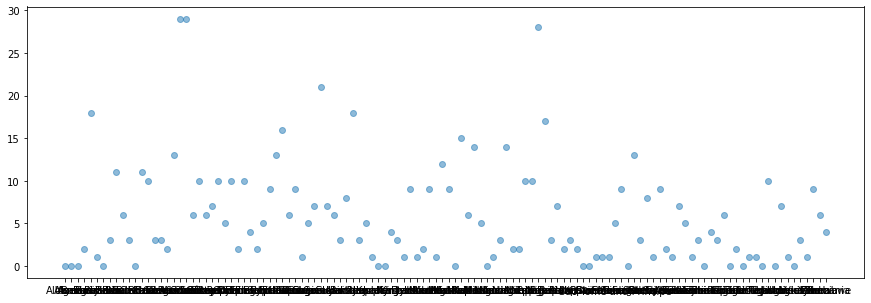

In [737]:
plt.figure(figsize=(15,5))
plt.scatter(forcedMarriageDataset['Country or area'],forcedMarriageDataset['Married by 15 %'] , alpha=0.5)


From the plot we can conclude, that there are 3 outliers in the data on the percentage of marriages by age 15. 

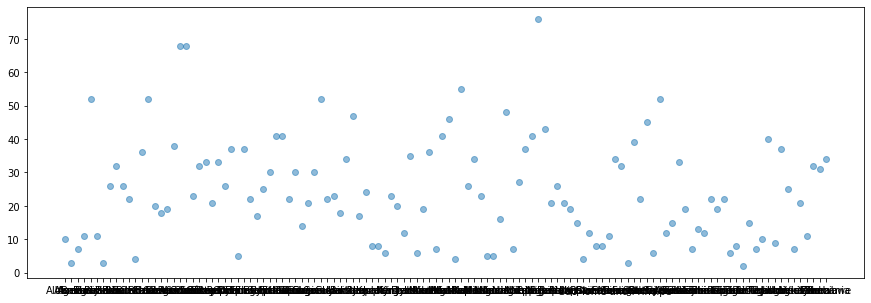

In [738]:
plt.figure(figsize=(15,5))
plt.scatter(forcedMarriageDataset['Country or area'],forcedMarriageDataset['Married by 18 %'] , alpha=0.5)

From the plot we can conclude, that there are 3 outliers in the data on the percentage of marriages by age 18, and the values are more distributed than that of the marriages by age 15. 

In [739]:
forcedMarriageDataset

,Country or area,Married by 15 %,Married by 18 %
1,Albania,0.0,10.0
2,Algeria,0.0,3.0
3,Armenia,0.0,7.0
4,Azerbaijan,2.0,11.0
5,Bangladesh,18.0,52.0
...,...,...,...
116,Vanuatu,3.0,21.0
117,Viet Nam,1.0,11.0
118,Yemen,9.0,32.0
119,Zambia,6.0,31.0


First, we will take a look at the legal age for marriage for both men and women, with and without parental consent and compare between the average legal age for marriage in both cases

In [740]:
LegalAgeForMarriage.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men
1,Afghanistan,16.000000,18.000000,15.00000,16.420635
2,Aland Islands1,18.000000,18.000000,15.72963,16.420635
3,Albania,17.937811,18.396552,16.00000,18.000000
4,Algeria,19.000000,19.000000,15.72963,16.420635
5,Andorra,16.000000,16.000000,14.00000,14.000000


In [741]:
withoutParentalConsentWomen =LegalAgeForMarriage['Without Parental Consent / Women'].mean()
withoutParentalConsentWomen

17.937810945273633

In [742]:
withoutParentalConsentMen =LegalAgeForMarriage['Without Parental Consent / Men'].mean()
withoutParentalConsentMen

18.39655172413793

In [743]:
parentalConsentWomen =LegalAgeForMarriage['With Parental Consent / Women'].mean()
parentalConsentWomen

15.729629629629617

In [744]:
parentalConsentMen =LegalAgeForMarriage['With Parental Consent / Men'].mean()
parentalConsentMen

16.420634920634892

C:\Users\hanin\AppData\Local\Temp/ipykernel_33672/3875613132.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  LegalAgeForMarriage.mean().plot(kind='barh', color = ['#F08080','#8B5F65'], figsize=(10,5))


<AxesSubplot:>

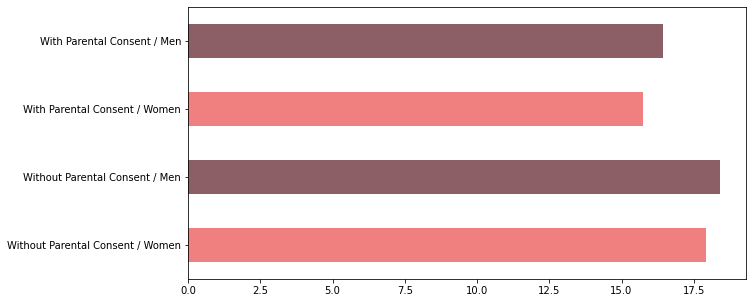

In [745]:
LegalAgeForMarriage.mean().plot(kind='barh', color = ['#F08080','#8B5F65'], figsize=(10,5))

From the figure, we can conclude that the legal age for marriage with parental consent for both men and women is much lower than the legal age for marriage without parental consent for both genders. As for women in specfic, in comparison to men, their legal age for marriage with parental consent is insignificantly lower than that of men. 

Now to examine how a low legal age of marriage with parental consent affects forced marriage in different countries, we will merge the legal age for marriage data with the percentage of forced marriage data.

Let's take a look at the shape of both the datasets first, to later evaluate how merging the dataset affects the records.

In [746]:
LegalAgeForMarriage.shape, forcedMarriageDataset.shape

((207, 5), (120, 3))

In [747]:
lowLegalAgeofMarriage = pd.merge(LegalAgeForMarriage,forcedMarriageDataset,'inner', on = 'Country or area' )
lowLegalAgeofMarriage.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men,Married by 15 %,Married by 18 %
0,Albania,17.937811,18.396552,16.00000,18.000000,0.0,10.0
1,Algeria,19.000000,19.000000,15.72963,16.420635,0.0,3.0
2,Armenia,17.000000,18.000000,15.72963,16.420635,0.0,7.0
3,Azerbaijan,17.937811,18.396552,17.00000,18.000000,2.0,11.0
4,Bangladesh,18.000000,21.000000,15.72963,16.420635,18.0,52.0


In [748]:
lowLegalAgeofMarriage.shape

(88, 7)

After merging the datasets on the country or area column, the number of records decreased significantly.

We will drop the columns we don't need first. 

In [749]:
lowLegalAgeofMarriage.drop(['Without Parental Consent / Women','Without Parental Consent / Men','With Parental Consent / Men'], axis =1, inplace = True)

In [750]:
lowLegalAgeofMarriage.head()

,Country or area,With Parental Consent / Women,Married by 15 %,Married by 18 %
0,Albania,16.00000,0.0,10.0
1,Algeria,15.72963,0.0,3.0
2,Armenia,15.72963,0.0,7.0
3,Azerbaijan,17.00000,2.0,11.0
4,Bangladesh,15.72963,18.0,52.0


We will retrieve the countries that have a legal age of marriage for women below 15 then the countries that have a legal age of marriage above 15 and compare between their percentages to forced marriage.

In [751]:
childMarriage = lowLegalAgeofMarriage[lowLegalAgeofMarriage['With Parental Consent / Women'] <= 18]

In [752]:
appropriateMarriage = lowLegalAgeofMarriage[lowLegalAgeofMarriage['With Parental Consent / Women'] >= 18]

Before visualizing the data, we will drop the "With Parental Consent / Women" since that we already know the range of values that we are working on.

In [753]:
childMarriage.drop(['With Parental Consent / Women'], axis =1, inplace =True)

C:\Users\hanin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [754]:
appropriateMarriage.drop(['With Parental Consent / Women'], axis =1, inplace =True)

Visualzing the data using 2 bar graphs:

<AxesSubplot:title={'center':'Marriage in countries with a low legal age of marriage with parental consent for women'}, xlabel='Country or area'>

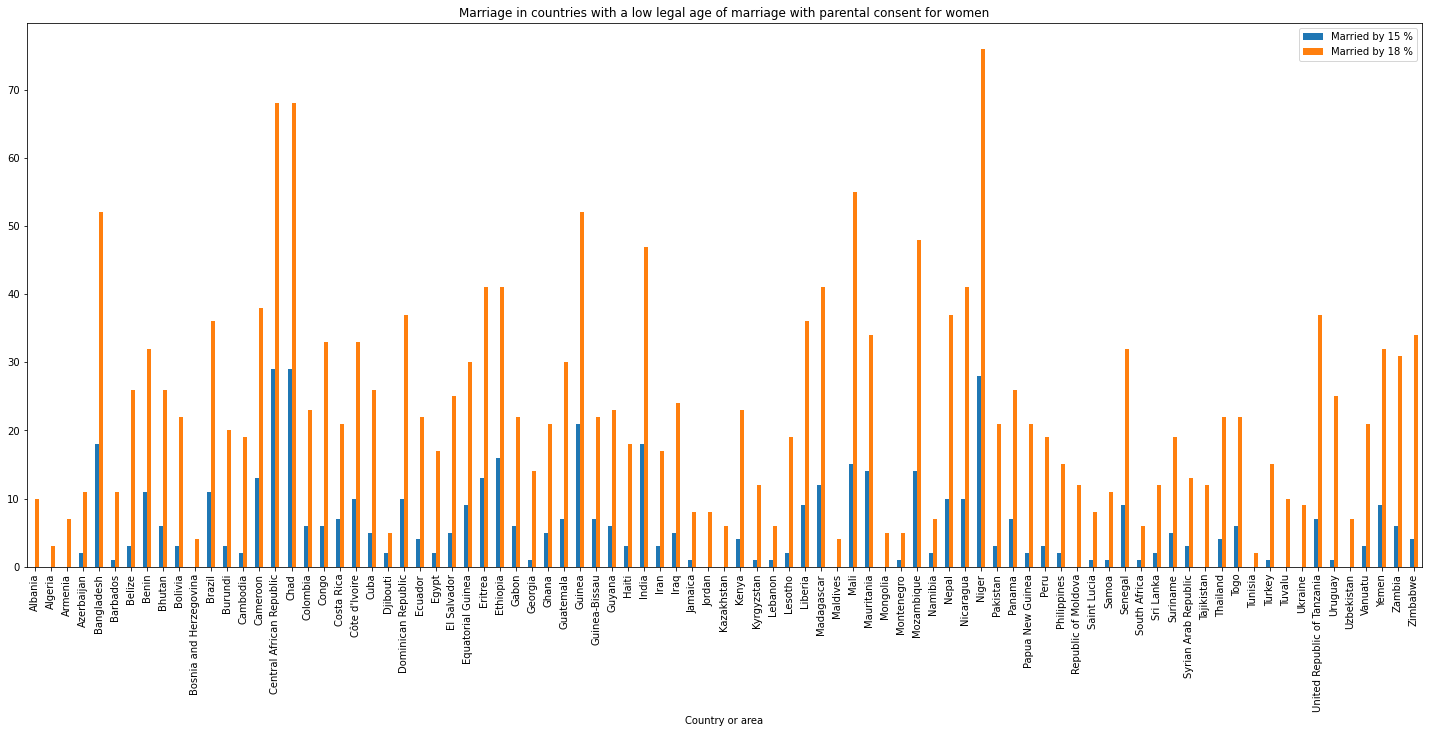

In [755]:
childMarriage.plot(x='Country or area', kind= 'bar', figsize=(25,10), title = 'Marriage in countries with a low legal age of marriage with parental consent for women')

<AxesSubplot:title={'center':'Marriage in countries with a an appropriate legal age of marriage with parental consent for women'}, xlabel='Country or area'>

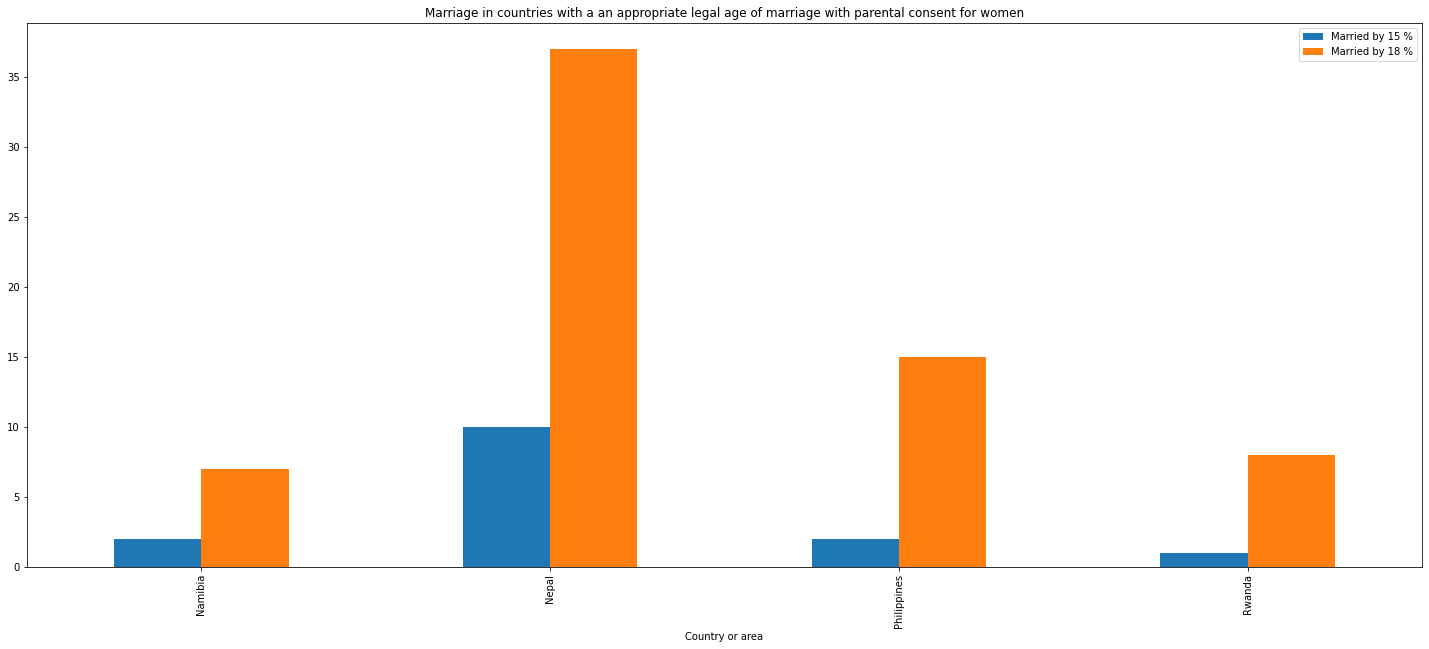

In [756]:
appropriateMarriage.plot(x='Country or area', kind= 'bar', figsize=(25,10), title = 'Marriage in countries with a an appropriate legal age of marriage with parental consent for women')

From the graphs, we can induced that eventhough, most countries have laws that support child marriage of women with their parental consent, which is considered forced marriage, the percentages of marriages did not vary much and most of the marriages were by the adulting age (18). 

### Question 4: What regions have the lowest percentage of female legislators and managers?

To answer this question we should categorize every country in the data set Women Legilators and Managers.
To do so... we will scrap a html page that will tell us every country is in which region.

In [757]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
url='https://meta.wikimedia.org/wiki/List_of_countries_by_regional_classification'
Regions = requests.get(url, headers = headers)

In [758]:
Regions_text = Regions.text
Regions_page = BeautifulSoup(Regions_text, 'html.parser')

In [759]:
Regions_page.prettify()[:1000]

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of countries by regional classification - Meta\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"61ffaef8-c69e-4271-a192-a5cd1b271e8c","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_regional_classification","wgTitle":"List of countries by regional classification","wgCurRevisionId":23212022,"wgRevisionId":23212022,"wgArticleId":1915260,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Global South"],"wgPageContentLanguage":"en

In [760]:
len(Regions_page.find('table'))

2

In [761]:
tables = Regions_page.find('table')
tables

<table class="wikitable sortable" style="text-align: left;">
<tbody><tr>
<th>Country
</th>
<th>Region
</th>
<th>Global South
</th></tr>
<tr>
<td>Andorra
</td>
<td>Europe
</td>
<td>Global North
</td></tr>
<tr>
<td>United Arab Emirates
</td>
<td>Middle east
</td>
<td>Global South
</td></tr>
<tr>
<td>Afghanistan
</td>
<td>Asia &amp; Pacific
</td>
<td>Global South
</td></tr>
<tr>
<td>Antigua and Barbuda
</td>
<td>South/Latin America
</td>
<td>Global South
</td></tr>
<tr>
<td>Anguilla
</td>
<td>South/Latin America
</td>
<td>Global South
</td></tr>
<tr>
<td>Albania
</td>
<td>Europe
</td>
<td>Global North
</td></tr>
<tr>
<td>Armenia
</td>
<td>Europe
</td>
<td>Global North
</td></tr>
<tr>
<td>Netherlands Antilles
</td>
<td>South/Latin America
</td>
<td>Global South
</td></tr>
<tr>
<td>Angola
</td>
<td>Africa
</td>
<td>Global South
</td></tr>
<tr>
<td>Antarctica
</td>
<td>Asia &amp; Pacific
</td>
<td>Global South
</td></tr>
<tr>
<td>Argentina
</td>
<td>South/Latin America
</td>
<td>Global South

In [762]:
tables.find_all('th')

[<th>Country
 </th>,
 <th>Region
 </th>,
 <th>Global South
 </th>]

In [763]:
tables.find_all('th')

[<th>Country
 </th>,
 <th>Region
 </th>,
 <th>Global South
 </th>]

In [764]:
Country = []
Region = []

In [765]:
rows = tables.find_all('tr')
i = 0 
for row in rows:
    if i == 0:
        i += 1
        continue
    cols = row.find_all('td')
    Country.append(cols[0].get_text().strip())
    Region.append(cols[1].get_text().strip())

In [766]:
len(Country), len(Region)

(248, 248)

In [767]:
Country

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Netherlands Antilles',
 'Angola',
 'Antarctica',
 'Argentina',
 'American Samoa',
 'Austria',
 'Australia',
 'Aruba',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Bermuda',
 'Brunei Darussalam',
 'Bolivia',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Cocos (Keeling) Islands',
 'Congo, The Democratic Republic of the',
 'Central African Republic',
 'Congo',
 'Switzerland',
 "Côte D'Ivoire",
 'Cook Islands',
 'Chile',
 'Cameroon',
 'China',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Cape Verde',
 'Christmas Island',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Western Sahara',
 'Eritrea',
 'Spain',
 'Ethiopia',
 'Finl

In [768]:
RegionDataSet = pd.DataFrame({'Country or area': Country, 'Region': Region})

In [769]:
RegionDataSet.dtypes

Country or area    object
Region             object
dtype: object

In [770]:
RegionDataSet.isnull().sum()

Country or area    0
Region             0
dtype: int64

In [771]:
RegionDataSetMerged = RegionDataSet.merge(WomenLegislators, on = 'Country or area')

In [772]:
print(RegionDataSetMerged.columns)

Index(['Country or area', 'Region',
       'Women's share of legislators, senior officials and managers (%)'],
      dtype='object')


In [773]:
RegionDataSetMerged = RegionDataSetMerged.groupby(by = ["Region"]).mean()

In [774]:
RegionDataSetMerged.reset_index(inplace =True)

In [775]:
RegionDataSetMerged.index = RegionDataSetMerged.index + 1

In [776]:
RegionDataSetMerged

,Region,"Women's share of legislators, senior officials and managers (%)"
1,Africa,30.293054
2,Arab States,9.994631
3,Asia & Pacific,26.142147
4,Europe,30.464569
5,Middle east,11.208799
6,North America,39.329939
7,South/Central America,40.993928
8,South/Latin America,37.835856


In [777]:
print(RegionDataSetMerged.columns)

Index(['Region', 'Women's share of legislators, senior officials and managers (%)'], dtype='object')


<AxesSubplot:title={'center':"Percentage of women's share in senior officials, legislators, and managers"}, xlabel=' ', ylabel='Percentage'>

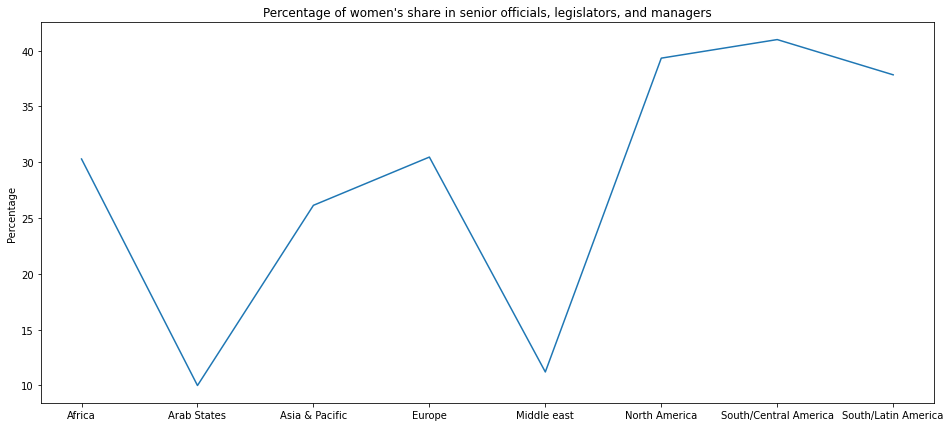

In [778]:
RegionDataSetMerged.plot(x = 'Region', xlabel=" ", y = "Women's share of legislators, senior officials and managers (%)", ylabel = "Percentage" , title = "Percentage of women's share in senior officials, legislators, and managers", kind = 'line', figsize =(16,7) , legend = False)

This plot represents the percentage of women working as senior officials, managers, and legislator in each region. as we can see from the line both the Middle east and the Arab States both have low percentages compared to other regions.

This data shows that in these two regions the women's percentage in the manegrial and legislators field are much lower compared to other parts in the world.

Now we'll see which countries exactly have low percentages in each of the two regions from the previous graph.

In [779]:
RegionDataSet2 = pd.DataFrame({'Country or area': Country, 'Region': Region})

In [780]:
RegionDataSet2 = RegionDataSet2.merge(WomenLegislators, on = 'Country or area')

In [781]:
RegionDataSet2

,Country or area,Region,"Women's share of legislators, senior officials and managers (%)"
0,United Arab Emirates,Middle east,9.945517
1,Antigua and Barbuda,South/Latin America,45.059786
2,Anguilla,South/Latin America,52.032520
3,Armenia,Europe,23.939559
4,Netherlands Antilles,South/Latin America,34.231537
...,...,...,...
109,Yemen,Middle east,2.135231
110,Serbia,Europe,36.220950
111,South Africa,Africa,29.970617
112,Montenegro,Europe,19.673786


In [782]:
MiddleEast = RegionDataSet2.loc[RegionDataSet2["Region"] == "Middle east"].copy()

In [783]:
MiddleEast = MiddleEast.sort_values(by = "Women's share of legislators, senior officials and managers (%)")

In [784]:
MiddleEast

,Country or area,Region,"Women's share of legislators, senior officials and managers (%)"
109,Yemen,Middle east,2.135231
88,Qatar,Middle east,6.832122
91,Saudi Arabia,Middle east,7.115901
58,Lebanon,Middle east,8.439225
79,Oman,Middle east,9.316980
0,United Arab Emirates,Middle east,9.945517
37,Egypt,Middle east,11.110487
55,Kuwait,Middle east,13.863962
50,Israel,Middle east,32.119763


In [785]:
ArabStates = RegionDataSet2.loc[RegionDataSet2["Region"] == "Arab States"]

In [786]:
ArabStates = ArabStates.sort_values(by = "Women's share of legislators, senior officials and managers (%)")

<AxesSubplot:title={'center':'Arab States'}, ylabel=' '>

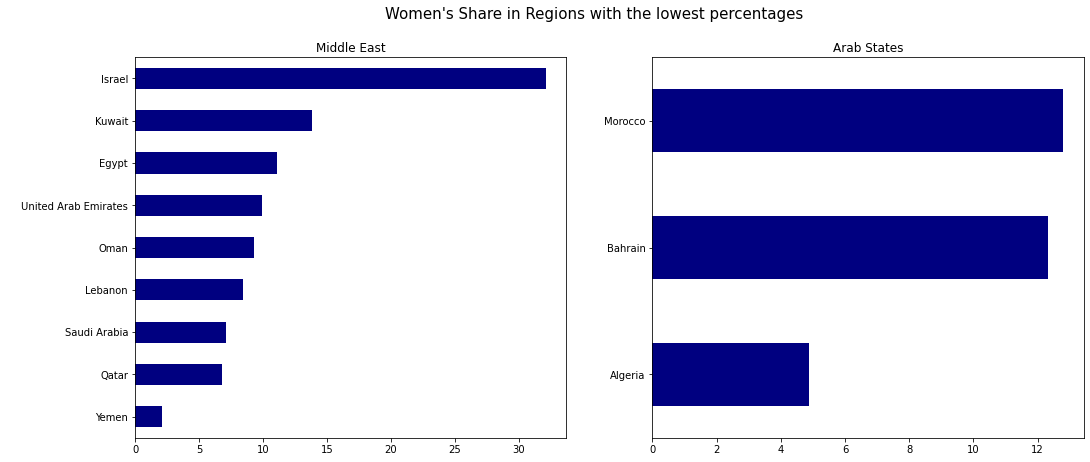

In [787]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,7))

fig.suptitle("Women's Share in Regions with the lowest percentages", fontsize=15)

MiddleEast.plot(y="Women's share of legislators, senior officials and managers (%)", x = "Country or area", xlabel = " ", title = "Middle East" ,color = 'navy', kind = 'barh', ax=ax1, legend = False)

ArabStates.plot(y="Women's share of legislators, senior officials and managers (%)", x = "Country or area" ,xlabel = " ",title = "Arab States", color = 'navy', kind = 'barh', ax=ax2, legend = False)

if we take a look at the two bar graphs shown above. in the Middle east region the countries which had the lowest percentage of women shares as managers were Yemen, Qatar, Saudi Arabia, and lebanon. all of these countries including Algeria from the Arab States region have less than 10% of women working as managers. 


### 6. Which countries have a relatively lower legal age of marriage for women than men and provide fewer maternity leave benefits?


We will answer this question by collecting data about countries with a low legal age of marriage and then
analysing the data about the maternity leave benefits, this goal can be achieved.


we will need the Legal age of Marriage dataset.

LegalAgeForMarriage

Now we'll create two seperate dataFrames. The first dataframe will contain the countries which have the lower age of marriage than men without parental consent and the second dataframe, with parental consent.

In [788]:
LAM_noParental = LegalAgeForMarriage[LegalAgeForMarriage["Without Parental Consent / Women"] < LegalAgeForMarriage["Without Parental Consent / Men"]]

In [789]:
LAM_noParental.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,With Parental Consent / Women,With Parental Consent / Men
1,Afghanistan,16.000000,18.000000,15.00000,16.420635
3,Albania,17.937811,18.396552,16.00000,18.000000
10,Armenia,17.000000,18.000000,15.72963,16.420635
14,Azerbaijan,17.937811,18.396552,17.00000,18.000000
17,Bangladesh,18.000000,21.000000,15.72963,16.420635


In [790]:
LAM_noParental.drop(columns = ['With Parental Consent / Women','With Parental Consent / Men'], axis = 1, inplace =True)

C:\Users\hanin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [791]:
LAM_noParental.count()

Country or area                     46
Without Parental Consent / Women    46
Without Parental Consent / Men      46
dtype: int64

Now we will merge this dataset with the scraped RegionDataSet. This will make it easier for us to regions which have countries with the lowest legal age without parental consent.

In [792]:
LAM_noParental = LAM_noParental.merge(RegionDataSet, on = "Country or area")

In [793]:
LAM_noParental.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,Region
0,Afghanistan,16.000000,18.000000,Asia & Pacific
1,Albania,17.937811,18.396552,Europe
2,Armenia,17.000000,18.000000,Europe
3,Azerbaijan,17.937811,18.396552,Asia & Pacific
4,Bangladesh,18.000000,21.000000,Asia & Pacific


Now we will merge the final dataset with the mternity leave benefits dataset

In [794]:
LAM_noParental = LAM_noParental.merge(MaternityLeaveBenefits, on = "Country or area")

In [795]:
LAM_noParental.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,Region,Length of maternity leave (Weeks),Percentage of wages paid in covered period (%),Provider of benefit
0,Afghanistan,16.000000,18.000000,Asia & Pacific,13.0,100.0,Employer
1,Albania,17.937811,18.396552,Europe,52.0,65.0,Social insurance system
2,Armenia,17.000000,18.000000,Europe,20.0,100.0,Social insurance
3,Azerbaijan,17.937811,18.396552,Asia & Pacific,18.0,100.0,Social security
4,Bangladesh,18.000000,21.000000,Asia & Pacific,16.0,100.0,Employer


we will drop the uneeded columns

In [796]:
LAM_noParental.drop(['Provider of benefit'], axis =1, inplace = True)

In [797]:
LAM_noParental.head()

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,Region,Length of maternity leave (Weeks),Percentage of wages paid in covered period (%)
0,Afghanistan,16.000000,18.000000,Asia & Pacific,13.0,100.0
1,Albania,17.937811,18.396552,Europe,52.0,65.0
2,Armenia,17.000000,18.000000,Europe,20.0,100.0
3,Azerbaijan,17.937811,18.396552,Asia & Pacific,18.0,100.0
4,Bangladesh,18.000000,21.000000,Asia & Pacific,16.0,100.0


In [798]:
LAM_noParental['Length of maternity leave (Weeks)'].median()

14.0

In [799]:
LAM_noParental[LAM_noParental['Length of maternity leave (Weeks)'] < 14]

,Country or area,Without Parental Consent / Women,Without Parental Consent / Men,Region,Length of maternity leave (Weeks),Percentage of wages paid in covered period (%)
0,Afghanistan,16.0,18.0,Asia & Pacific,13.0,100.0
5,Bolivia,14.0,16.0,South/Latin America,12.0,75.0
6,Burundi,18.0,21.0,Africa,12.0,100.0
10,China,20.0,22.0,Asia & Pacific,13.0,100.0
14,India,18.0,21.0,Asia & Pacific,12.0,100.0
15,Indonesia,16.0,19.0,Asia & Pacific,12.0,100.0
17,Kuwait,15.0,17.0,Middle east,10.0,100.0
18,Lebanon,12.5,16.0,Middle east,7.0,100.0
21,Nicaragua,18.0,21.0,South/Central America,12.0,100.0
23,Pakistan,16.0,18.0,Asia & Pacific,12.0,100.0


In [800]:
LAM_noParental.drop(['Without Parental Consent / Women','Without Parental Consent / Men','Region'], axis =1, inplace= True)

<AxesSubplot:ylabel='Country or area'>

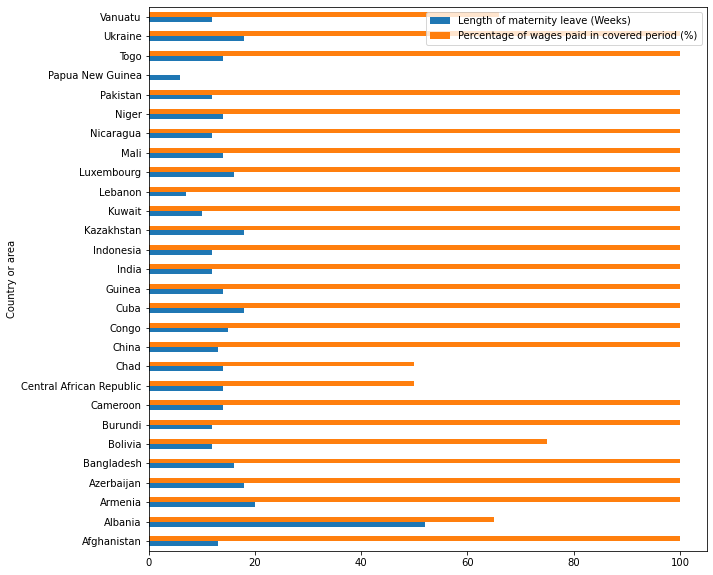

In [801]:
LAM_noParental.plot(kind ='barh',x= 'Country or area', figsize= (10,10))

As the graph shows, these countries are the contries with low women legal age for marriage and maternity leave benefits less than the median value.

### Question 7: What regions have SMAM that is relatively higher for men than women, indicating that men of these regions marry women that are younger than them?
      a. Can this be linked to male dominance in these regions?

Can be proven by comparing the SMAM of women and men within a country
and linking the results to an analysis on external data about male dominance in the
countries of that region.


Then, we need data on countries that are male dominant

we will scrape : https://www.worldatlas.com/articles/countries-where-men-outnumber-women.html


In [802]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
url='https://www.worldatlas.com/articles/countries-where-men-outnumber-women.html'
maleDominance = requests.get(url,headers=headers)

In [803]:
maleDominance_text = maleDominance.text
maleDominance_page = BeautifulSoup(maleDominance_text,'html.parser')

In [804]:
maleDominance_page.prettify()[:3000]

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="user-scalable=yes, initial-scale=1.0, width=device-width" name="viewport"/>\n  <meta content="max-image-preview:large" name="robots"/>\n  <link href="https://www.worldatlas.com/articles/countries-where-men-outnumber-women.html" rel="canonical"/>\n  <meta content="In six countries (Qatar, the UAE, Oman, Bahrain, Maldives, and Kuwait), at least 60% of the population are men." name="description"/>\n  <link href="/nwa_assets/img/site/favicon.png" rel="icon" type="image/x-icon"/>\n  <link as="font" crossorigin="" href="https://www.worldatlas.com/nwa_assets/fonts/fontello/fontello.woff2?23444444" rel="preload" type="font/woff2"/>\n  <link as="image" href="https://www.worldatlas.com/r/w960-q80/upload/e6/6c/54/countries-with-more-men-than-women-001.jpeg" media="(min-width: 768px)" rel="preload"/>\n  <link as="image" href="https://www.worldatlas.com/r/w768-q80

In [805]:
regexTags = '<[a-z]+>'
Tags = re.findall(regexTags,maleDominance_text)
print(Tags)

['<head>', '<title>', '<script>', '<script>', '<body>', '<header>', '<figcaption>', '<figcaption>', '<figcaption>', '<figcaption>', '<figcaption>', '<figcaption>', '<thead>', '<tr>', '<th>', '<th>', '<th>', '<tbody>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>', '<td>', '<td>', '<tr>', '<td>'

By inspecting the page, we found the div that contains the data table

In [806]:
divID='article_table'
tableDiv = maleDominance_page.find('div',attrs={'id':divID})
print(tableDiv)

<div class="mod_excess excess_show_desktop" id="article_table">
<table data-role="table">
<thead><tr><th>Rank</th><th>Country</th><th>Male population (% of total population)</th></tr></thead>
<tbody><tr><td>1</td><td>Qatar</td><td>75</td></tr><tr><td>2</td><td>United Arab Emirates</td><td>69</td></tr><tr><td>3</td><td>Oman</td><td>66</td></tr><tr><td>4</td><td>Bahrain</td><td>64</td></tr><tr><td>5</td><td>Maldives</td><td>63</td></tr><tr><td>6</td><td>Kuwait</td><td>61</td></tr><tr><td>7</td><td>Saudi Arabia</td><td>58</td></tr><tr><td>8</td><td>Equatorial Guinea</td><td>56</td></tr><tr><td>9</td><td>Bhutan</td><td>53</td></tr><tr><td>10</td><td>Djibouti</td><td>53</td></tr><tr><td>11</td><td>Singapore</td><td>52</td></tr><tr><td>12</td><td>India</td><td>52</td></tr><tr><td>13</td><td>Brunei Darussalam</td><td>52</td></tr><tr><td>14</td><td>Samoa</td><td>52</td></tr><tr><td>15</td><td>Pakistan</td><td>51</td></tr><tr><td>16</td><td>Malaysia</td><td>51</td></tr><tr><td>17</td><td>Afghan

In [807]:
tableData= tableDiv.find('table')
print(tableData)

<table data-role="table">
<thead><tr><th>Rank</th><th>Country</th><th>Male population (% of total population)</th></tr></thead>
<tbody><tr><td>1</td><td>Qatar</td><td>75</td></tr><tr><td>2</td><td>United Arab Emirates</td><td>69</td></tr><tr><td>3</td><td>Oman</td><td>66</td></tr><tr><td>4</td><td>Bahrain</td><td>64</td></tr><tr><td>5</td><td>Maldives</td><td>63</td></tr><tr><td>6</td><td>Kuwait</td><td>61</td></tr><tr><td>7</td><td>Saudi Arabia</td><td>58</td></tr><tr><td>8</td><td>Equatorial Guinea</td><td>56</td></tr><tr><td>9</td><td>Bhutan</td><td>53</td></tr><tr><td>10</td><td>Djibouti</td><td>53</td></tr><tr><td>11</td><td>Singapore</td><td>52</td></tr><tr><td>12</td><td>India</td><td>52</td></tr><tr><td>13</td><td>Brunei Darussalam</td><td>52</td></tr><tr><td>14</td><td>Samoa</td><td>52</td></tr><tr><td>15</td><td>Pakistan</td><td>51</td></tr><tr><td>16</td><td>Malaysia</td><td>51</td></tr><tr><td>17</td><td>Afghanistan</td><td>51</td></tr><tr><td>18</td><td>Seychelles</td><td>

In [808]:
tableData.find('thead')

<thead><tr><th>Rank</th><th>Country</th><th>Male population (% of total population)</th></tr></thead>

We will choose the columns we need.

In [809]:
country = []
percentage = []

In [810]:
rows =tableData.find_all('tr')
i = 0 
for row in rows:
    if i == 0:
        i += 1
        continue
    cols = row.find_all('td')
    country.append(cols[1].get_text().strip())
    percentage.append(cols[2].get_text().strip())

In [811]:
len(country), len(percentage)

(42, 42)

In [812]:
MaleDominanceDataset = pd.DataFrame({'Country or area': country, 'Male population (% of total population)':percentage})
MaleDominanceDataset.head()

,Country or area,Male population (% of total population)
0,Qatar,75
1,United Arab Emirates,69
2,Oman,66
3,Bahrain,64
4,Maldives,63


### Data Tiding and Cleaning

In [813]:
MaleDominanceDataset.reset_index(drop=True, inplace=True)
MaleDominanceDataset.index = MaleDominanceDataset .index + 1
MaleDominanceDataset.head()

,Country or area,Male population (% of total population)
1,Qatar,75
2,United Arab Emirates,69
3,Oman,66
4,Bahrain,64
5,Maldives,63


In [814]:
MaleDominanceDataset.dtypes

Country or area                            object
Male population (% of total population)    object
dtype: object

we need to correct the datatypes

In [815]:
MaleDominanceDataset['Male population (% of total population)']= MaleDominanceDataset['Male population (% of total population)'].astype(float)

In [816]:
MaleDominanceDataset.dtypes

Country or area                             object
Male population (% of total population)    float64
dtype: object

We will check for nulls

In [817]:
MaleDominanceDataset.isna().sum()

Country or area                            0
Male population (% of total population)    0
dtype: int64

No nulls

We will check for duplicates

In [818]:
MaleDominanceDataset.duplicated().sum()

0

No duplicates

Finally, we will check for outliers using a scatter plot

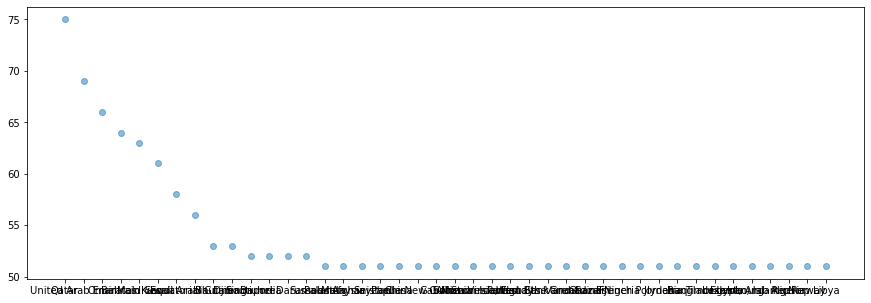

In [819]:
plt.figure(figsize=(15,5))
plt.scatter(MaleDominanceDataset['Country or area'],MaleDominanceDataset['Male population (% of total population)'] , alpha=0.5)

The data is evenly distributed, and shows only 1 outlier, that lies above 75%

The SMAM stands for singlulated mean age at marriage, this value expresses the average number of years a person spends being single.

To answer this question, we will first we will merge the marriages dataset and the regions dataset scraped previously. Then, we will get the rows where the women SMAM is lower than the men SMAM.

In [820]:
womenSMAM = pd.merge(Marriages,RegionDataSet,'inner', on = 'Country or area' )
womenSMAM.head()

,Country or area,Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men,Region
0,Afghanistan,17.3,2.074619,21.5,28.753807,Asia & Pacific
1,Albania,7.2,2.000000,25.1,29.200000,Europe
2,Algeria,1.8,0.200000,29.5,33.000000,Arab States
3,American Samoa,21.4,2.074619,25.7,28.753807,Asia & Pacific
4,Angola,35.7,7.600000,19.4,24.500000,Africa


We will drop the columns we don't need for this question.

In [821]:
womenSMAM.drop(['Population aged 15-19 ever married (%) / Women','Population aged 15-19 ever married (%) / Men'], axis =1, inplace =True)

In [822]:
womenSMAM.head()

,Country or area,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men,Region
0,Afghanistan,21.5,28.753807,Asia & Pacific
1,Albania,25.1,29.200000,Europe
2,Algeria,29.5,33.000000,Arab States
3,American Samoa,25.7,28.753807,Asia & Pacific
4,Angola,19.4,24.500000,Africa


In [823]:
womenSMAM[womenSMAM['Singulate mean age at marraige / Women'] < womenSMAM['Singulate mean age at marraige / Men']]

,Country or area,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men,Region
0,Afghanistan,21.5,28.753807,Asia & Pacific
1,Albania,25.1,29.200000,Europe
2,Algeria,29.5,33.000000,Arab States
3,American Samoa,25.7,28.753807,Asia & Pacific
4,Angola,19.4,24.500000,Africa
...,...,...,...,...
190,Vanuatu,22.6,25.300000,Asia & Pacific
191,Western Sahara,18.0,25.300000,Africa
192,Yemen,22.2,25.400000,Middle east
193,Zambia,21.1,25.500000,Africa


In [824]:
lowWomenSMAM = womenSMAM[womenSMAM['Singulate mean age at marraige / Women'] < womenSMAM['Singulate mean age at marraige / Men']]

In [825]:
lowWomenSMAM2 = lowWomenSMAM.groupby('Region')['Singulate mean age at marraige / Women'].count().to_frame().reindex()

In [826]:
lowWomenSMAM2.reset_index(inplace= True)
lowWomenSMAM2.index = lowWomenSMAM2.index+1

In [827]:
lowWomenSMAM2.columns

Index(['Region', 'Singulate mean age at marraige / Women'], dtype='object')

In [828]:
lowWomenSMAM2

,Region,Singulate mean age at marraige / Women
1,Africa,42
2,Arab States,8
3,Asia & Pacific,46
4,Europe,44
5,Middle east,12
6,North America,1
7,South/Central America,1
8,South/Latin America,41


<AxesSubplot:ylabel='Region'>

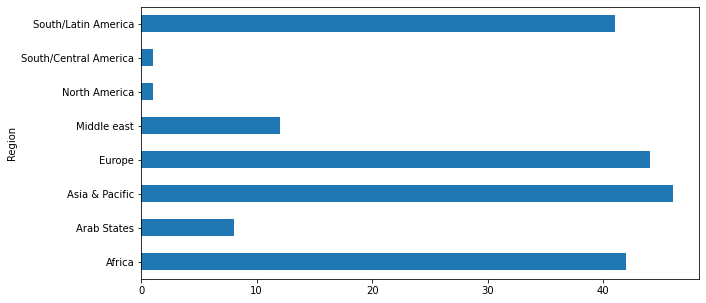

In [829]:
lowWomenSMAM2.plot(kind = 'barh', ylabel = 'Number of countries in the region with a women SMAM less than the men SMAM',x='Region',xlabel='Region', figsize=(10,5),legend= False)

As the figure illustrates, the region with a women SMAM lower than men is Asia and pacific, then comes Europe, South/Latin America.This concludes that men in thesse regions marry younger women. 

We can further sort the data so clearly see which regions have the highest to the lowest number of countries with a lower women SMAM. 

In [830]:
lowWomenSMAM2['Singulate mean age at marraige / Women'].sort_values(ascending = False)

3    46
4    44
1    42
8    41
5    12
2     8
6     1
7     1
Name: Singulate mean age at marraige / Women, dtype: int64

Furthermore, we need to answer the subgoal of this question.

For the subgoal, we need to further integrate the data scraped on male dominance in countries, with the countries that have a lower women SMAM. 

Before merging the datasets, we will look at the sizes of the datasets to examine how merging them affected their size.

In [831]:
lowWomenSMAM.shape

(195, 4)

In [832]:
womenSMAMandMaleDominance= pd.merge(lowWomenSMAM,MaleDominanceDataset,'inner', on = 'Country or area' )
womenSMAMandMaleDominance.head()

,Country or area,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men,Region,Male population (% of total population)
0,Afghanistan,21.5,28.753807,Asia & Pacific,51.0
1,Albania,25.1,29.200000,Europe,51.0
2,Algeria,29.5,33.000000,Arab States,51.0
3,Bahrain,26.3,30.000000,Arab States,64.0
4,Bangladesh,18.6,25.400000,Asia & Pacific,51.0


In [833]:
womenSMAMandMaleDominance.shape

(37, 5)

Merging the datasets has significantly affected the number of records 

In [834]:
plot2 = womenSMAMandMaleDominance.groupby('Region')['Male population (% of total population)'].mean().to_frame().reindex()

In [835]:
plot2.reset_index(inplace= True)
plot2.index = plot2.index+1

In [836]:
plot2

,Region,Male population (% of total population)
1,Africa,52.000000
2,Arab States,56.000000
3,Asia & Pacific,52.058824
4,Europe,51.000000
5,Middle east,60.250000
6,South/Latin America,51.000000


<AxesSubplot:xlabel='Region'>

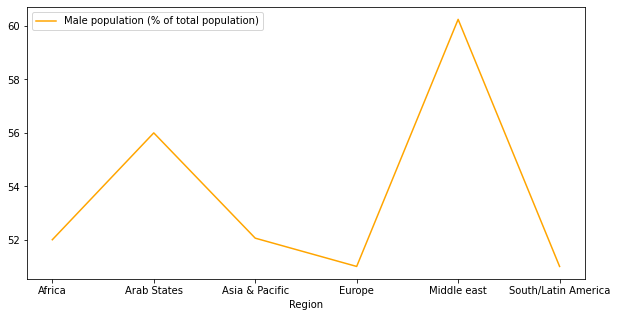

In [837]:
plot2.plot(kind = 'line', x='Region', figsize = (10,5), color = 'orange')

The line plot here shows that the Middle eastern region is the region with the highest percentage of male dominance, then comes the Arab states.

To get a better understanding of the results, we can calculate the mean women SMAM at each region and examine the correlation between the 2 values. 

In [838]:
plot3= womenSMAMandMaleDominance.groupby('Region')['Singulate mean age at marraige / Women'].mean().to_frame().reindex()

In [839]:
plot3.reset_index(inplace= True)
plot3.index = plot3.index+1

In [840]:
plot3

,Region,Singulate mean age at marraige / Women
1,Africa,22.800000
2,Arab States,27.833333
3,Asia & Pacific,23.500000
4,Europe,28.233333
5,Middle east,25.787500
6,South/Latin America,22.900000


In [841]:
mergedLine = pd.merge(plot2, plot3,'inner', on = 'Region' )
mergedLine

,Region,Male population (% of total population),Singulate mean age at marraige / Women
0,Africa,52.000000,22.800000
1,Arab States,56.000000,27.833333
2,Asia & Pacific,52.058824,23.500000
3,Europe,51.000000,28.233333
4,Middle east,60.250000,25.787500
5,South/Latin America,51.000000,22.900000


<AxesSubplot:xlabel='Region'>

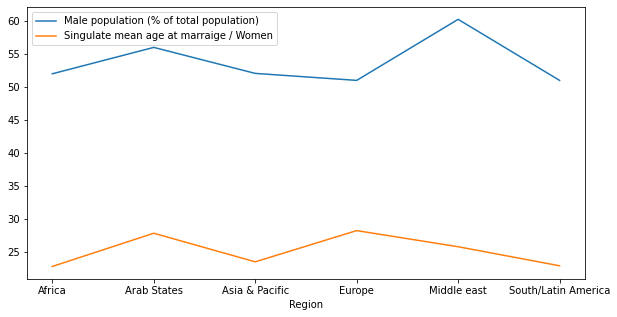

In [842]:
mergedLine.plot(kind = 'line', x = 'Region', figsize=(10,5))

The above figure illustrates that male dominance and women's age at marriage have a negative correlation where as the population of males in a region increases the average age at which women get married in the same region decreases. In conclusion, male dominance in a region can contribute to older men marrying younger women. 

## Hypothesis Testing

Hypothesis: countries with illterate men, get married at a young age

Null Hypotjesis H0: Men illteracy is not related to men young marriage

Alternaive Hypothesis H1: Men illteracy is related to men young marriage

We will use t-test to perform our hypothesis testing.

First, we will merge the datasets

In [843]:
test =  pd.merge(illiteracy, Marriages, 'inner', on= 'Country or area')
test.head()

,Country or area,Year,"Illiteracy rate (%), population aged 15-24 (Women)","Illiteracy rate (%), population aged 15-24 (Men)",Population aged 15-19 ever married (%) / Women,Population aged 15-19 ever married (%) / Men,Singulate mean age at marraige / Women,Singulate mean age at marraige / Men
0,Algeria,2000-2004,14.4,6.0,1.8,0.2,29.5,33.0
1,Angola,2001,37.4,17.3,35.7,7.6,19.4,24.5
2,Benin,2002,67.5,41.8,22.2,1.5,20.5,25.3
3,Botswana,2000-2004,7.2,14.5,5.3,1.2,26.4,30.9
4,Burkina Faso,1996,86.0,74.5,32.4,1.7,19.5,25.3


We will drop the unneeded columns.

In [844]:
test.drop(['Year','Illiteracy rate (%), population aged 15-24 (Women)','Population aged 15-19 ever married (%) / Women','Singulate mean age at marraige / Women','Singulate mean age at marraige / Men'], axis =1, inplace = True)

In [845]:
test.head()

,Country or area,"Illiteracy rate (%), population aged 15-24 (Men)",Population aged 15-19 ever married (%) / Men
0,Algeria,6.0,0.2
1,Angola,17.3,7.6
2,Benin,41.8,1.5
3,Botswana,14.5,1.2
4,Burkina Faso,74.5,1.7


for the t-test we need to find multiple values:

x̄1 and x̄2 are sample means for x1 and x2 respectively.<br>

n1 and n2 are the numbers of observations in x1 and x2 respectively.<br>

s1 and s2 are the sample standard deviation for x1 and x2 respectively.<br>

In [846]:
l1=len(test['Illiteracy rate (%), population aged 15-24 (Men)'])
l2=len(test['Population aged 15-19 ever married (%) / Men'])
l1,l2

(124, 124)

In [847]:
x1Mean=test['Illiteracy rate (%), population aged 15-24 (Men)'].mean()
x2Mean=test['Population aged 15-19 ever married (%) / Men'].mean()
x1Mean,x2Mean

(10.956451612903228, 2.432016538398559)

In [848]:
x1var=test['Illiteracy rate (%), population aged 15-24 (Men)'].var(ddof=1)
x2var=test['Population aged 15-19 ever married (%) / Men'].var(ddof=1)
x1var,x2var

(231.7237791765015, 6.34218891550128)

In [849]:
num=(l1-1)*x1var+(l2-1)*x2var
dem=l1+l2-2
part1=num/dem
part2=(1/l1)+(1/l2)
S=np.sqrt(part1*part2)
S

1.3855998121577655

In [850]:
tScore=(x1Mean-x2Mean)/S
tScore

6.152162406279303

In [851]:
DegreeF=l1+l2-2
DegreeF

246

In [852]:
alpha = 0.05

From the t-test table the value of alpha 0.05 and 246 is 1.660

In [853]:
import scipy
scipy.stats.t.ppf(1-0.05, 246)

1.6510713448508132

In [854]:
scipy.stats.ttest_ind(test['Illiteracy rate (%), population aged 15-24 (Men)'],test['Population aged 15-19 ever married (%) / Men']).statistic

6.1521624062793006

Since that the t-score exceeds the table value, H0 will be rejected and H1 will be accepted. 